# <a id='toc1_'></a>[Final Report (3 of 3)](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [Final Report (3 of 3)](#toc1_)    
  - [II. Data Analysis](#toc1_1_)    
    - [II.4. Customer-profile level aggregations for usage frequency and expenditure](#toc1_1_1_)    
      - [II.4.1. Customer-profile level aggregations for usage frequency](#toc1_1_1_1_)    
        - [II.4.1.1. Aggregations of order frequency by day of week](#toc1_1_1_1_1_)    
        - [II.4.1.2. Aggregations of order frequency by hour of day](#toc1_1_1_1_2_)    
        - [II.4.1.3. Aggregations of order frequency by days since prior order](#toc1_1_1_1_3_)    
      - [II.4.2. Customer-profile level aggregations for expenditure](#toc1_1_1_2_)    
        - [II.4.2.1. Aggregations of prices](#toc1_1_1_2_1_)    
    - [II.5. Customer profiles vs. regions and departments comparisons](#toc1_1_2_)    
      - [II.5.1. Create crosstabs between customer profiles and region](#toc1_1_2_1_)    
      - [II.5.2. Create crosstabs between customer profiles and departments](#toc1_1_2_2_)    
    - [II.6. Frequency of orders by loyalty flag](#toc1_1_3_)    
    - [II.7. Frequency of product orders per department](#toc1_1_4_)    
  - [III. Data Visualization & Observations](#toc1_2_)    
    - [III.1. Set up dataframe & matplotlib parameters for visualization](#toc1_2_1_)    
      - [III.1.1. Set up dataframe](#toc1_2_1_1_)    
      - [III.1.2. Set up matplotlib parameters](#toc1_2_1_2_)    
    - [III.2. Visualizations](#toc1_2_2_)    
      - [III.2.1. Relationship between age vs. family status vs. order hour of day](#toc1_2_2_1_)    
      - [III.2.2. Behavior of Customers by loyalty flag](#toc1_2_2_2_)    
      - [III.2.3. Distribution of product orders by department](#toc1_2_2_3_)    
      - [III.2.4. Distribution of profiles](#toc1_2_2_4_)    
      - [III.2.5. Customer profiles vs. regions and departments comparison](#toc1_2_2_5_)    
        - [III.2.5.1. Customer profiles vs. regions](#toc1_2_2_5_1_)    
        - [III.2.5.2. Customer profiles vs. departments comparison](#toc1_2_2_5_2_)    
  - [IV. Data Cleaning](#toc1_3_)    
  - [V. Data Export](#toc1_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import scipy

import textwrap

In [2]:
# create a path to the directory
path = r'C:\Users\Ansgar.S\Uyen\OneDrive\Documents\Data Immersion\Achievement IV - Python Fundamentals for Data Analysts\02-2023 Instacart Basket Analysis'

# import the 'orders_products_customer_profiles_high_activity.pkl' dataset
merged_df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customer_profiles_high_activity.pkl'))

# import the 'departments_wrangled.csv' dataset
df_deps = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

## <a id='toc1_1_'></a>[II. Data Analysis](#toc0_)

### <a id='toc1_1_1_'></a>[II.4. Customer-profile level aggregations for usage frequency and expenditure](#toc0_)

In [4]:
# change the data type of column 'department_id' in df_deps to string
df_deps['department_id'] = df_deps['department_id'].astype('str')

In [5]:
# create column 'department' in merged_df with the name of corresponding department_id
merged_df = merged_df.merge(df_deps[['department_id', 'department']], on = 'department_id', how = 'left')

In [6]:
# create a list of customer profile columns
customer_profiles = ['age_bracket', 'income_bracket', 'family_type', 'health_conscious_shopper', 'alcohol_drinker', 'pet_owner', 'meat_eater', 'family_oriented_shopper', 'convenience_shopper', 'bulk_buyer']

In [4]:
print('Columns in customer_profiles:')
customer_profiles

Columns in customer_profiles:


['age_bracket',
 'income_bracket',
 'family_type',
 'health_conscious_shopper',
 'alcohol_drinker',
 'pet_owner',
 'meat_eater',
 'family_oriented_shopper',
 'convenience_shopper',
 'bulk_buyer']

In [7]:
# create a new list from customer_profiles that include 'region'
customer_profiles_with_region = customer_profiles.copy()
customer_profiles_with_region.append('region')

In [6]:
print('Columns in customer_profiles_with_region:')
customer_profiles_with_region

Columns in customer_profiles_with_region:


['age_bracket',
 'income_bracket',
 'family_type',
 'health_conscious_shopper',
 'alcohol_drinker',
 'pet_owner',
 'meat_eater',
 'family_oriented_shopper',
 'convenience_shopper',
 'bulk_buyer',
 'region']

#### <a id='toc1_1_1_1_'></a>[II.4.1. Customer-profile level aggregations for usage frequency](#toc0_)

##### <a id='toc1_1_1_1_1_'></a>[II.4.1.1. Aggregations of order frequency by day of week](#toc0_)

In [7]:
# aggregations of orders_day_of_week on the entire customer base
print('Aggregations on the entire customer base:')
merged_df.agg({'orders_day_of_week' : ['mean', 'min', 'max']})

Aggregations on the entire customer base:


,orders_day_of_week
mean,2.740726
min,0.000000
max,6.000000


In [ ]:
# create loop to print the aggregations of orders_day_of_week for each column in customer_profiles_with_region
for col in customer_profiles_with_region:
    print(f'By {col}:')
    display(merged_df.groupby(col).agg({'orders_day_of_week' : ['mean', 'min', 'max']}))

By age_bracket:


orders_day_of_week        
                                mean min max
age_bracket                                 
Middle-aged adult           2.735754   0   6
Senior                      2.744091   0   6
Young adult                 2.740100   0   6

By income_bracket:


orders_day_of_week        
                                  mean min max
income_bracket                                
High income                   2.748765   0   6
Low income                    2.686729   0   6
Lower-middle income           2.758944   0   6
Upper-middle income           2.729136   0   6
Very high income              2.747169   0   6

By family_type:


orders_day_of_week        
                                                mean min max
family_type                                                 
Divorced/widowed with no children           2.752613   0   6
Living with family                          2.744275   0   6
Married with children                       2.740334   0   6
Married with no children                    2.745926   0   6
Single with no children                     2.727216   0   6

By health_conscious_shopper:


orders_day_of_week        
                                       mean min max
health_conscious_shopper                           
No                                 2.926297   0   6
Yes                                2.738334   0   6

By alcohol_drinker:


orders_day_of_week        
                              mean min max
alcohol_drinker                           
No                        2.731289   0   6
Yes                       2.857144   0   6

By pet_owner:


orders_day_of_week        
                        mean min max
pet_owner                           
No                  2.729838   0   6
Yes                 2.827893   0   6

By meat_eater:


orders_day_of_week        
                         mean min max
meat_eater                           
No                   2.775823   0   6
Yes                  2.728721   0   6

By family_oriented_shopper:


orders_day_of_week        
                                      mean min max
family_oriented_shopper                           
No                                2.680530   0   6
Yes                               2.756853   0   6

By convenience_shopper:


orders_day_of_week        
                                  mean min max
convenience_shopper                           
No                            2.835075   0   6
Yes                           2.740238   0   6

By bulk_buyer:


orders_day_of_week        
                         mean min max
bulk_buyer                           
No                   2.740157   0   6
Yes                  2.744426   0   6

By region:


orders_day_of_week        
                        mean min max
region                              
Midwest             2.740697   0   6
Northeast           2.736462   0   6
South               2.744556   0   6
West                2.738714   0   6

**Observation**: The main insight that can be derived from this data is that there is not much variation in the orders_day_of_week metric across different segments of customers.

The mean values are all close to 2.74, indicating that customers tend to place orders on all days of the week, with no clear preference for any particular day. However, there are some minor differences in the mean values for different segments, with some such as lower-middle income customers, non health-conscious shoppers, alcohol drinkers and pet owners, having slightly higher mean values, indicating that they may be more likely to place orders later in the week.

Instacart can optimize operations and marketing strategies with this data by determining the best days of the week to offer promotions or discounts, or to staff delivery drivers in different regions based on when customers are most likely to place orders.

The data can also help identify customer segments that are more likely to place orders on certain days of the week, which can be used to tailor marketing campaigns and promotions to those segments.

##### <a id='toc1_1_1_1_2_'></a>[II.4.1.2. Aggregations of order frequency by hour of day](#toc0_)

In [9]:
# aggregations of order_hour_of_day on the entire customer base
print('Aggregations on the entire customer base:')
merged_df.agg({'order_hour_of_day' : ['mean', 'min', 'max']})

Aggregations on the entire customer base:


,order_hour_of_day
mean,13.411224
min,0.000000
max,23.000000


In [ ]:
# create loop to print the aggregations of order_hour_of_day for each column in customer_profiles_with_region
for col in customer_profiles_with_region:
    print(f'By {col}:')
    display(merged_df.groupby(col).agg({'order_hour_of_day' : ['mean', 'min', 'max']}))

By age_bracket:


order_hour_of_day        
                               mean min max
age_bracket                                
Middle-aged adult         13.421276   0  23
Senior                    13.412941   0  23
Young adult               13.389857   0  23

By income_bracket:


order_hour_of_day        
                                 mean min max
income_bracket                               
High income                 13.454723   0  23
Low income                  13.077985   0  23
Lower-middle income         13.218800   0  23
Upper-middle income         13.420887   0  23
Very high income            13.435242   0  23

By family_type:


order_hour_of_day        
                                               mean min max
family_type                                                
Divorced/widowed with no children         13.433668   0  23
Living with family                        13.404198   0  23
Married with children                     13.416890   0  23
Married with no children                  13.386082   0  23
Single with no children                   13.421014   0  23

By health_conscious_shopper:


order_hour_of_day        
                                      mean min max
health_conscious_shopper                          
No                               13.034206   0  23
Yes                              13.416083   0  23

By alcohol_drinker:


order_hour_of_day        
                             mean min max
alcohol_drinker                          
No                      13.410843   0  23
Yes                     13.415920   0  23

By pet_owner:


order_hour_of_day        
                       mean min max
pet_owner                          
No                13.400682   0  23
Yes               13.495623   0  23

By meat_eater:


order_hour_of_day        
                        mean min max
meat_eater                          
No                 13.229466   0  23
Yes                13.473395   0  23

By family_oriented_shopper:


order_hour_of_day        
                                     mean min max
family_oriented_shopper                          
No                              13.399592   0  23
Yes                             13.414341   0  23

By convenience_shopper:


order_hour_of_day        
                                 mean min max
convenience_shopper                          
No                          12.606566   0  23
Yes                         13.415386   0  23

By bulk_buyer:


order_hour_of_day        
                        mean min max
bulk_buyer                          
No                 13.410673   0  23
Yes                13.414807   0  23

By region:


order_hour_of_day        
                       mean min max
region                             
Midwest           13.428322   0  23
Northeast         13.411254   0  23
South             13.404330   0  23
West              13.404511   0  23

**Observation**: From the data, it appears that the average time of day for all customers to make purchases is around 1:30 PM (13:30), and this average time is similar across different regions, age brackets, family types, and whether the customer is an alcohol drinker or not.

However, there are some slight variations in the average purchase times based on various demographic factors. For example, customers with high incomes tend to make purchases slightly later in the day than customers with low incomes. Additionally, customers who are health-conscious or pet owners tend to make purchases later in the day than those who are not.

These insights can be useful for Instacart in determining when to schedule promotions or discounts to increase sales.

##### <a id='toc1_1_1_1_3_'></a>[II.4.1.3. Aggregations of order frequency by days since prior order](#toc0_)

In [11]:
# aggregations of days_since_prior_order on the entire customer base
print('Aggregations on the entire customer base:')
merged_df.agg({'days_since_prior_order' : ['mean', 'min', 'max']})

Aggregations on the entire customer base:


,days_since_prior_order
mean,10.817463
min,0.000000
max,30.000000


In [7]:
# create loop to print the aggregations of days_since_prior_order for each column in customer_profiles_with_region
for col in customer_profiles_with_region:
    print(f'By {col}:')
    display(merged_df.groupby(col).agg({'days_since_prior_order' : ['mean', 'min', 'max']}))

By age_bracket:


days_since_prior_order           
                                    mean  min   max
age_bracket                                        
Middle-aged adult              10.813300  0.0  30.0
Senior                         10.816338  0.0  30.0
Young adult                    10.827411  0.0  30.0

By income_bracket:


days_since_prior_order           
                                      mean  min   max
income_bracket                                       
High income                      10.800331  0.0  30.0
Low income                       11.632584  0.0  30.0
Lower-middle income              11.163704  0.0  30.0
Upper-middle income              10.771630  0.0  30.0
Very high income                 10.701035  0.0  30.0

By family_type:


days_since_prior_order           
                                                    mean  min   max
family_type                                                        
Divorced/widowed with no children              10.730938  0.0  30.0
Living with family                             10.752319  0.0  30.0
Married with children                          10.828774  0.0  30.0
Married with no children                       10.830757  0.0  30.0
Single with no children                        10.830576  0.0  30.0

By health_conscious_shopper:


days_since_prior_order           
                                           mean  min   max
health_conscious_shopper                                  
No                                    13.967544  0.0  30.0
Yes                                   10.778284  0.0  30.0

By alcohol_drinker:


days_since_prior_order           
                                  mean  min   max
alcohol_drinker                                  
No                           10.828982  0.0  30.0
Yes                          10.675187  0.0  30.0

By pet_owner:


days_since_prior_order           
                            mean  min   max
pet_owner                                  
No                     10.896304  0.0  30.0
Yes                    10.191762  0.0  30.0

By meat_eater:


days_since_prior_order           
                             mean  min   max
meat_eater                                  
No                      11.555495  0.0  30.0
Yes                     10.568955  0.0  30.0

By family_oriented_shopper:


days_since_prior_order           
                                          mean  min   max
family_oriented_shopper                                  
No                                   12.673779  0.0  30.0
Yes                                  10.333660  0.0  30.0

By convenience_shopper:


days_since_prior_order           
                                      mean  min   max
convenience_shopper                                  
No                               12.865328  0.0  30.0
Yes                              10.807288  0.0  30.0

By bulk_buyer:


days_since_prior_order           
                             mean  min   max
bulk_buyer                                  
No                      11.143539  0.0  30.0
Yes                      8.742843  0.0  30.0

By region:


days_since_prior_order           
                            mean  min   max
region                                     
Midwest                10.898916  0.0  30.0
Northeast              10.772811  0.0  30.0
South                  10.824547  0.0  30.0
West                   10.764563  0.0  30.0

**Observation**: The data shows that the average number of days since the last order for the entire customer base is 10.82 days. Looking at the breakdown by customer characteristics, it appears that customers with low and lower-middle income take longer than other income segments to reorder.

Further analysis of shopping behavior segments shows that health-conscious shoppers, alcohol drinkers, pet owners, meat eaters, family-oriented shoppers and convenience shoppers all tend to order more frequently, with an average days_since_prior_order below the overall average.

Moreover, bulk buyers have the shortest average days since their last order at 8.74 days, indicating that they order very frequently, while customers who are not health-conscious shoppers take the longest at 13.97 days.

These insights can be very useful for Instacart to improve its business operations and drive more sales, such as developing promotions or discounts that target customers who take longer to reorder and encourage them to place orders more frequently.

Similarly, with customers who tend to order more frequently, Instacart can create personalized recommendations and promotions for these customers, promoting relevant products and services that match their preferences.

#### <a id='toc1_1_1_2_'></a>[II.4.2. Customer-profile level aggregations for expenditure](#toc0_)

##### <a id='toc1_1_1_2_1_'></a>[II.4.2.1. Aggregations of prices](#toc0_)

In [13]:
# aggregations of prices on the entire customer base
print('Aggregations on the entire customer base:')
merged_df.agg({'prices' : ['mean', 'min', 'max']})

Aggregations on the entire customer base:


,prices
mean,7.791538
min,1.000000
max,25.000000


In [8]:
# create loop to print the aggregations of prices for each column in customer_profiles_with_region
for col in customer_profiles_with_region:
    print(f'By {col}:')
    display(merged_df.groupby(col).agg({'prices' : ['mean', 'min', 'max']}))

By age_bracket:


prices           
                       mean  min   max
age_bracket                           
Middle-aged adult  7.795355  1.0  25.0
Senior             7.791984  1.0  25.0
Young adult        7.783970  1.0  25.0

By income_bracket:


prices           
                         mean  min   max
income_bracket                          
High income          7.957658  1.0  25.0
Low income           6.530998  1.0  25.0
Lower-middle income  6.720296  1.0  25.0
Upper-middle income  7.891132  1.0  25.0
Very high income     7.940064  1.0  25.0

By family_type:


prices           
                                       mean  min   max
family_type                                           
Divorced/widowed with no children  7.801214  1.0  25.0
Living with family                 7.806732  1.0  25.0
Married with children              7.788354  1.0  25.0
Married with no children           7.797207  1.0  25.0
Single with no children            7.783098  1.0  25.0

By health_conscious_shopper:


prices           
                              mean  min   max
health_conscious_shopper                     
No                        7.325277  1.0  25.0
Yes                       7.797547  1.0  25.0

By alcohol_drinker:


prices           
                     mean  min   max
alcohol_drinker                     
No               7.792477  1.0  25.0
Yes              7.779957  1.0  25.0

By pet_owner:


prices           
               mean  min   max
pet_owner                     
No         7.789353  1.0  25.0
Yes        7.809027  1.0  25.0

By meat_eater:


prices           
                mean  min   max
meat_eater                     
No          7.468397  1.0  20.0
Yes         7.902070  1.0  25.0

By family_oriented_shopper:


prices           
                             mean  min   max
family_oriented_shopper                     
No                       7.799006  1.0  25.0
Yes                      7.789537  1.0  25.0

By convenience_shopper:


prices           
                         mean  min   max
convenience_shopper                     
No                   7.867487  1.0  25.0
Yes                  7.791145  1.0  25.0

By bulk_buyer:


prices           
                mean  min   max
bulk_buyer                     
No          7.791457  1.0  25.0
Yes         7.792065  1.0  25.0

By region:


prices           
               mean  min   max
region                        
Midwest    7.793709  1.0  25.0
Northeast  7.781929  1.0  25.0
South      7.795776  1.0  25.0
West       7.790677  1.0  25.0

**Observation**: The data shows prices being fairly consistent across regions and age brackets, but vary more based on income bracket. Notably, low and lower-middle income customers spend less compared to other income segments, customers with upper-middle, high or very high income spend more on average.

Customers who are health-conscious shoppers, pet owners, and meat eaters tend to have higher average prices than those who are not. Alcohol drinkers, faimily-oriented and convenience shoppers also have slightly lower average prices than their counterpart.

These insights can be useful for targeting specific customer segments with marketing strategies or product offerings, such as premium products and services offers to high-income customers, or healthy and pet-friendly products promotion to health-conscious shoppers and pet owners.

### <a id='toc1_1_2_'></a>[II.5. Customer profiles vs. regions and departments comparisons](#toc0_)

#### <a id='toc1_1_2_1_'></a>[II.5.1. Create crosstabs between customer profiles and region](#toc0_)

In [8]:
# create an empty dictionary to store the crosstabs 
region_crosstab_dict = {}

In [9]:
# create loop to iterate over each column and create crosstabs between customer profiles and region
for col in customer_profiles:
    crosstab_name = col + '_region_crosstab'
    region_crosstab_dict[crosstab_name] = pd.crosstab(merged_df['region'], merged_df[col], dropna=False)

In [ ]:
# print all the crosstabs
for col in customer_profiles:
    print(f'Crosstab of {col} and region:')
    display(pd.crosstab(merged_df['region'], merged_df[col], dropna=False))

Crosstab of age_bracket and region:


age_bracket,Middle-aged adult,Senior,Young adult
region,,,
Midwest,2168146,3413159,1278550
Northeast,1607813,2599749,970482
South,3078005,4820883,1848042
West,2330592,3759163,1396354


Crosstab of income_bracket and region:


income_bracket,High income,Low income,Lower-middle income,Upper-middle income,Very high income
region,,,,,
Midwest,2351766,50155,691455,2895419,871060
Northeast,1746587,30261,524883,2231241,645072
South,3191326,60777,1015440,4266879,1212508
West,2472589,40072,755735,3272397,945316


Crosstab of family_type and region:


family_type,Divorced/widowed with no children,Living with family,Married with children,Married with no children,Single with no children
region,,,,,
Midwest,585547,330020,3171985,1631060,1141243
Northeast,455421,243892,2434529,1219665,824537
South,832425,481633,4599573,2232601,1600698
West,637230,349595,3532763,1731102,1235419


Crosstab of health_conscious_shopper and region:


health_conscious_shopper,No,Yes
region,,
Midwest,91115,6768740
Northeast,63209,5114835
South,121646,9625284
West,96445,7389664


Crosstab of alcohol_drinker and region:


alcohol_drinker,No,Yes
region,,
Midwest,6341445,518410
Northeast,4806839,371205
South,9009350,737580
West,6918475,567634


Crosstab of pet_owner and region:


pet_owner,No,Yes
region,,
Midwest,6078643,781212
Northeast,4611461,566583
South,8696630,1050300
West,6634003,852106


Crosstab of meat_eater and region:


meat_eater,No,Yes
region,,
Midwest,1767744,5092111
Northeast,1310116,3867928
South,2496653,7250277
West,1885899,5600210


Crosstab of family_oriented_shopper and region:


family_oriented_shopper,No,Yes
region,,
Midwest,1461915,5397940
Northeast,1080919,4097125
South,2058709,7688221
West,1583574,5902535


Crosstab of convenience_shopper and region:


convenience_shopper,No,Yes
region,,
Midwest,36480,6823375
Northeast,25222,5152822
South,49034,9697896
West,39884,7446225


Crosstab of bulk_buyer and region:


bulk_buyer,No,Yes
region,,
Midwest,5956325,903530
Northeast,4483008,695036
South,8432996,1313934
West,6498709,987400


#### <a id='toc1_1_2_2_'></a>[II.5.2. Create crosstabs between customer profiles and departments](#toc0_)

In [10]:
# create an empty dictionary to store the crosstabs 
dep_crosstab_dict = {}

In [11]:
# create loop to iterate over each column and create crosstabs between customer profiles and department
for col in customer_profiles_with_region:
    dep_crosstab_name = col + '_dep_crosstab'
    dep_crosstab_dict[dep_crosstab_name] = pd.crosstab(merged_df['department'], merged_df[col], dropna=False)

In [ ]:
# print all the crosstabs
for col in customer_profiles_with_region:
    print(f'Crosstab of {col} and department:')
    display(pd.crosstab(merged_df['department'], merged_df[col], dropna=False))

Crosstab of age_bracket and department:


age_bracket,Middle-aged adult,Senior,Young adult
department,,,
alcohol,44225,66764,26953
babies,122877,191645,73217
bakery,332467,528746,198613
beverages,758239,1221693,450725
breakfast,197409,314523,120823
bulk,9920,15551,6089
canned goods,298660,476379,181793
dairy eggs,1544507,2427664,919969
deli,298310,472689,177800


Crosstab of income_bracket and department:


income_bracket,High income,Low income,Lower-middle income,Upper-middle income,Very high income
department,,,,,
alcohol,43243,1146,15655,55330,22568
babies,136939,1101,25303,174368,50028
bakery,359784,5645,95087,459603,139707
beverages,768306,22205,340364,1003996,295786
breakfast,201814,4567,81571,265853,78950
bulk,9874,329,4128,13790,3439
canned goods,334045,3867,70745,423707,124468
dairy eggs,1654063,26551,446998,2141699,622829
deli,318361,5977,94588,411175,118698


Crosstab of family_type and department:


family_type,Divorced/widowed with no children,Living with family,Married with children,Married with no children,Single with no children
department,,,,,
alcohol,11252,8222,62959,31569,23940
babies,32765,18233,184692,87111,64938
bakery,90881,50998,495102,247347,175498
beverages,209866,114034,1141370,564909,400478
breakfast,53807,31330,294939,148992,103687
bulk,2531,1525,14962,7523,5019
canned goods,79967,45977,450065,223409,157414
dairy eggs,419832,236749,2288827,1145112,801620
deli,82234,45412,445651,218688,156814


Crosstab of health_conscious_shopper and department:


health_conscious_shopper,No,Yes
department,,
alcohol,11297,126645
babies,3737,384002
bakery,11906,1047920
beverages,87104,2343553
breakfast,12663,620092
bulk,168,31392
canned goods,6186,950646
dairy eggs,57529,4834611
deli,7224,941575


Crosstab of alcohol_drinker and department:


alcohol_drinker,No,Yes
department,,
alcohol,0,137942
babies,372987,14752
bakery,960437,99389
beverages,2192722,237935
breakfast,582583,50172
bulk,31107,453
canned goods,881022,75810
dairy eggs,4560368,331772
deli,888814,59985


Crosstab of pet_owner and department:


pet_owner,No,Yes
department,,
alcohol,112912,25030
babies,354123,33616
bakery,930066,129760
beverages,2130168,300489
breakfast,563233,69522
bulk,29541,2019
canned goods,838263,118569
dairy eggs,4398549,493591
deli,845878,102921


Crosstab of meat_eater and department:


meat_eater,No,Yes
department,,
alcohol,60852,77090
babies,68294,319445
bakery,240570,819256
beverages,863307,1567350
breakfast,196960,435795
bulk,10672,20888
canned goods,185944,770888
dairy eggs,1260932,3631208
deli,231348,717451


Crosstab of family_oriented_shopper and department:


family_oriented_shopper,No,Yes
department,,
alcohol,22679,115263
babies,0,387739
bakery,204861,854965
beverages,491489,1939168
breakfast,118739,514016
bulk,8735,22825
canned goods,193416,763416
dairy eggs,1061739,3830401
deli,223515,725284


Crosstab of convenience_shopper and department:


convenience_shopper,No,Yes
department,,
alcohol,4925,133017
babies,939,386800
bakery,3301,1056525
beverages,28852,2401805
breakfast,2620,630135
bulk,108,31452
canned goods,0,956832
dairy eggs,30366,4861774
deli,0,948799


Crosstab of bulk_buyer and department:


bulk_buyer,No,Yes
department,,
alcohol,135981,1961
babies,334547,53192
bakery,929638,130188
beverages,2178011,252646
breakfast,559716,73039
bulk,0,31560
canned goods,826722,130110
dairy eggs,4246165,645975
deli,817512,131287


Crosstab of region and department:


region,Midwest,Northeast,South,West
department,,,,
alcohol,32809,23805,46367,34961
babies,90056,69339,131171,97173
bakery,247653,188898,350623,272652
beverages,565552,437983,811743,615379
breakfast,147529,111207,209970,164049
bulk,7491,5252,10510,8307
canned goods,224414,167994,319004,245420
dairy eggs,1144827,863968,1628966,1254379
deli,221848,168674,315367,242910


### <a id='toc1_1_3_'></a>[II.6. Frequency of orders by loyalty flag](#toc0_)

In [12]:
# create a crosstab of loyalty flag by day of week
loyalty_orders_dow_crosstab = pd.crosstab(merged_df['orders_day_of_week'], merged_df['loyalty_flag'], normalize = 'index')

In [29]:
print('Behavior of Customers by Loyalty Flag Throughout the Week:')
loyalty_orders_dow_crosstab

Behavior of Customers by Loyalty Flag Throughout the Week:


loyalty_flag,Loyal customer,New customer,Regular customer
orders_day_of_week,,,
0,0.296619,0.166717,0.536664
1,0.340572,0.151284,0.508143
2,0.335407,0.155278,0.509315
3,0.344103,0.152784,0.503113
4,0.355714,0.147662,0.496624
5,0.360610,0.146300,0.493090
6,0.306816,0.161137,0.532047


In [13]:
# create a crosstab of loyalty flag by hour of day
loyalty_orders_hour_crosstab = pd.crosstab(merged_df['order_hour_of_day'], merged_df['loyalty_flag'], normalize = 'index')

In [31]:
print('Behavior of Customers by Loyalty Flag Throughout the Day:')
loyalty_orders_hour_crosstab

Behavior of Customers by Loyalty Flag Throughout the Day:


loyalty_flag,Loyal customer,New customer,Regular customer
order_hour_of_day,,,
0,0.296414,0.170903,0.532683
1,0.277466,0.190486,0.532047
2,0.269218,0.189850,0.540932
3,0.268577,0.197243,0.534181
4,0.331853,0.164036,0.504110
5,0.351681,0.146685,0.501634
6,0.399257,0.120464,0.480278
7,0.400292,0.118594,0.481114
8,0.387662,0.125745,0.486593


### <a id='toc1_1_4_'></a>[II.7. Frequency of product orders per department](#toc0_)

In [14]:
# create dataframe product_orders_dep with the mean values of 'order_number' of merged_df grouped by department
product_orders_dep = merged_df.groupby('department').agg({'order_number' : ['mean']})

print('Mean of order number, grouped by department:')
product_orders_dep

Mean of order number, grouped by department:


,order_number
,mean
department,
alcohol,16.039212
babies,19.799125
bakery,17.846499
beverages,17.876203
breakfast,17.438904
bulk,20.865177
canned goods,16.917236
dairy eggs,18.299213


In [15]:
# sort product_orders_dep in a ascending order
product_orders_dep_sorted = product_orders_dep.sort_values(('order_number', 'mean'), ascending = True)

In [16]:
# create a subset of unique bulk products, sorted by order_number
bulk_orders = merged_df[merged_df['department'] == 'bulk'][['product_name', 'order_number']].drop_duplicates().sort_values('order_number', ascending = False)

In [55]:
# outputs of bulk_orders
print('Top 10 bulk products by order numbers:')
bulk_orders.head(10)

Top 10 bulk products by order numbers:


,product_name,order_number
2576145,Rolled Oats,99
14062935,Organic Short Brown Sprouted Rice,99
4361017,Dried Mango,99
2413600,Organic Rolled Oats,99
11498221,Organic Black Mission Figs,99
3833151,Apricots,99
2388565,Organic Short Brown Sprouted Rice,98
3847160,Organic Mung Beans,98
5698530,Apricots,98
377102,Dried Mango,98


In [17]:
# create a subset of unique babies products, sorted by order_number
babies_orders = merged_df[merged_df['department'] == 'babies'][['product_name', 'order_number']].drop_duplicates().sort_values('order_number', ascending = False)

In [57]:
# outputs of babies_orders
print('Top 10 babies products by order numbers:')
babies_orders.head(10)

Top 10 babies products by order numbers:


,product_name,order_number
13863340,Baby Food Pears Squash,99
7330057,Stage 1 Just Sweet Peas With Mint Baby Food,99
4453468,Baby Food Stage 2 Pumpkin Banana,99
7435868,Squash & Sweet Peas Stage 2,99
7388189,Free & Clear Diapers,99
16970510,One & Done Refreshing Cucumber & Green Tea Bab...,99
1164482,Apple Blueberry Baby Food,99
7330311,Peachy Keen Organic Level 1,99
17041511,"Organic Pears, Apples, Peaches, Pumpkin + Cinn...",99
17041814,"Fiber & Protein Organic Pears, Raspberries, Bu...",99


## <a id='toc1_2_'></a>[III. Data Visualization & Observations](#toc0_)

### <a id='toc1_2_1_'></a>[III.1. Set up dataframe & matplotlib parameters for visualization](#toc0_)

#### <a id='toc1_2_1_1_'></a>[III.1.1. Set up dataframe](#toc0_)

In [18]:
# create a subset of merged_df without duplicating user_ids
df_unique_user = merged_df.drop_duplicates(subset='user_id')

In [ ]:
# check the output of df_unique_user
print('Sample output of df_unique_user:')
df_unique_user.sample(3)

Sample output of df_unique_user:


,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,income_bracket,family_type,health_conscious_shopper,alcohol_drinker,pet_owner,meat_eater,family_oriented_shopper,convenience_shopper,bulk_buyer,department
12973854,260,Cantaloupe,24,4,1.4,3051592,23362,14,1,13,...,High income,Married with children,Yes,No,No,Yes,No,Yes,No,produce
15258827,283,Organic Whole Wheat Elbows,131,9,1.4,2164544,164925,6,0,15,...,Upper-middle income,Married with no children,Yes,No,No,Yes,Yes,Yes,No,dry goods pasta
21267113,717,Sweeper Open Window Fresh Scent Wet Mopping Cl...,114,17,12.3,415138,204537,2,0,14,...,Upper-middle income,Married with children,No,No,No,Yes,Yes,Yes,No,household


In [19]:
# create a list 'dev' holding boolean values of random numbers less than or equal to 0.7
np.random.seed(4)
dev = np.random.rand(len(merged_df)) <= 0.7

In [ ]:
# store 70% of the sample in the dataframe 'big'
big = merged_df[dev]

In [20]:
# store 30% of the sample in the dataframe 'small'
small = merged_df[~dev]

#### <a id='toc1_2_1_2_'></a>[III.1.2. Set up matplotlib parameters](#toc0_)

In [21]:
# set up the parameters
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'Lucida Console'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'

In [53]:
# create lists of colors
retro = ['#D2D79F', '#90B77D', '#42855B', '#F0EBCE', '#CFB997']
autumn = ['#285430', '#5F8D4E', '#A4BE7B', '#E5D9B6']

### <a id='toc1_2_2_'></a>[III.2. Visualizations](#toc0_)

#### <a id='toc1_2_2_1_'></a>[III.2.1. Relationship between age vs. family status vs. order hour of day](#toc0_)

In [41]:
# create a new dataframe 'df_slice' that contains only columns 'age', 'family_status' and 'order_hour_of_day' from small
df_slice = small[['age','family_status', 'order_hour_of_day']]

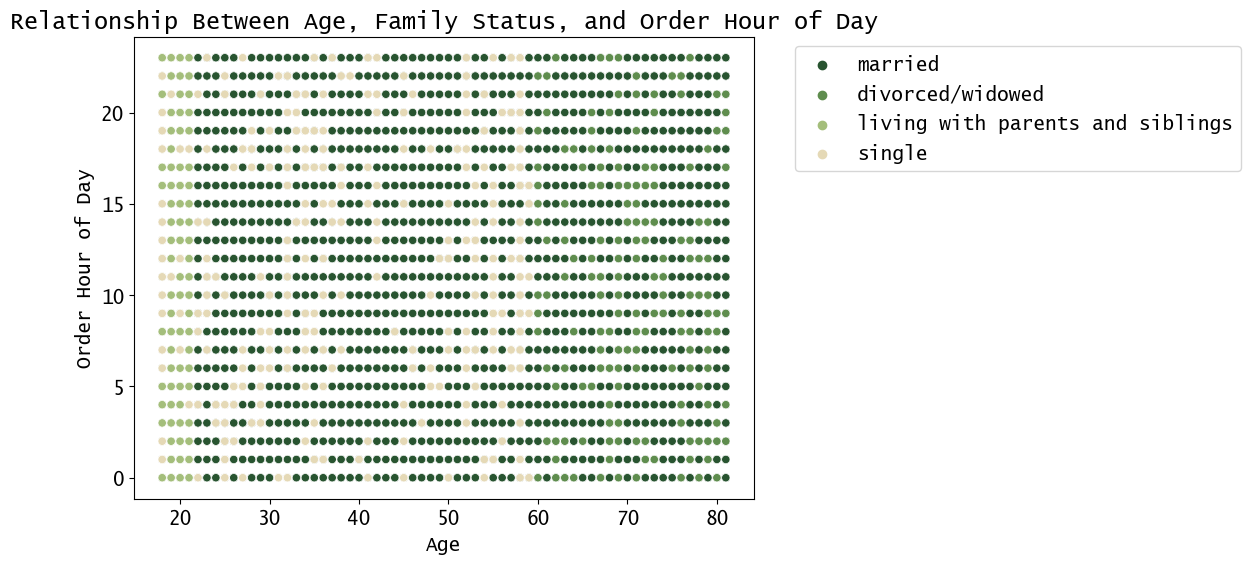

In [55]:
# set the color palette
sns.set_palette(autumn)

# create a scatterplot with different markers for each family status
scatter_age_family_status_order_hour = sns.scatterplot(x = 'age', y = 'order_hour_of_day', hue = 'family_status', data= df_slice, markers = ['o', 's', 'd', 'X'])

# set the axis labels and title
plt.xlabel('Age')
plt.ylabel('Order Hour of Day')
plt.title('Relationship Between Age, Family Status, and Order Hour of Day')

# set the legend outside of the chart
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

# show the plot
plt.show()

**Observation**: The scatterplot provides a comprehensive view of the customer base and reveals the interplay between age, family status, and ordering behavior.

It indicates that customers living with family tend to be in their 20s and place orders throughout the day, while divorced/widowed customers are typically seniors in their 60s to 80s and prefer to order between midnight to 3 pm. The majority of the customer base is married, representing all age groups, tend to place their orders from 10am to around 5pm.

Conversely, single customers, mostly young or middle-aged, do not follow a consistent ordering pattern throughout the day.

#### <a id='toc1_2_2_2_'></a>[III.2.2. Behavior of Customers by loyalty flag](#toc0_)

In [29]:
# Define the color scheme as a dictionary mapping variables to colors
loyalty_colors = {
    'New customer': '#D2D79F',
    'Regular customer': '#90B77D',
    'Loyal customer': '#42855B'
}

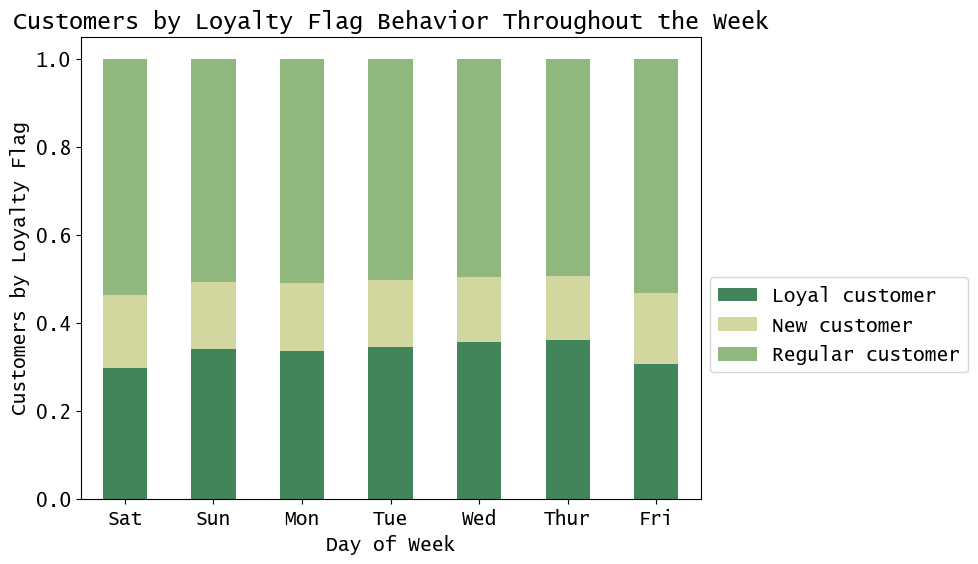

In [63]:
# create a 100% stacked bar chart
stacked_bar_loyalty_orders_dow = loyalty_orders_dow_crosstab.plot(kind = 'bar', stacked = True, color = [loyalty_colors['Loyal customer'], loyalty_colors['New customer'], loyalty_colors['Regular customer']])

# set axis labels and title
plt.xlabel('Day of Week')
plt.ylabel('Customers by Loyalty Flag')
plt.title('Customers by Loyalty Flag Behavior Throughout the Week')

# move legend outside the plot
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))

# rotate x-axis labels
plt.xticks(rotation = 0)

# change x-axis ticks
xtick_labels = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri']
xtick_values = range(0, 7)
plt.xticks(xtick_values, xtick_labels)

# show the plot
plt.show()

**Observation**: Based on the above chart, it can be observed that:

- Loyal customers tend to order more in the middle of the week (Tuesday, Wednesday and Thursday).

- New customers tend to order more on weekends as compared to weekdays.

- Regular customers, similarly, prefer to order on the weekend. Wednesday and Thursday are the least busy days for these customers.

Instacart can consider offering promotions and discounts to encourage new customers to order more on weekdays. This could potentially increase their loyalty and convert them into regular customers.

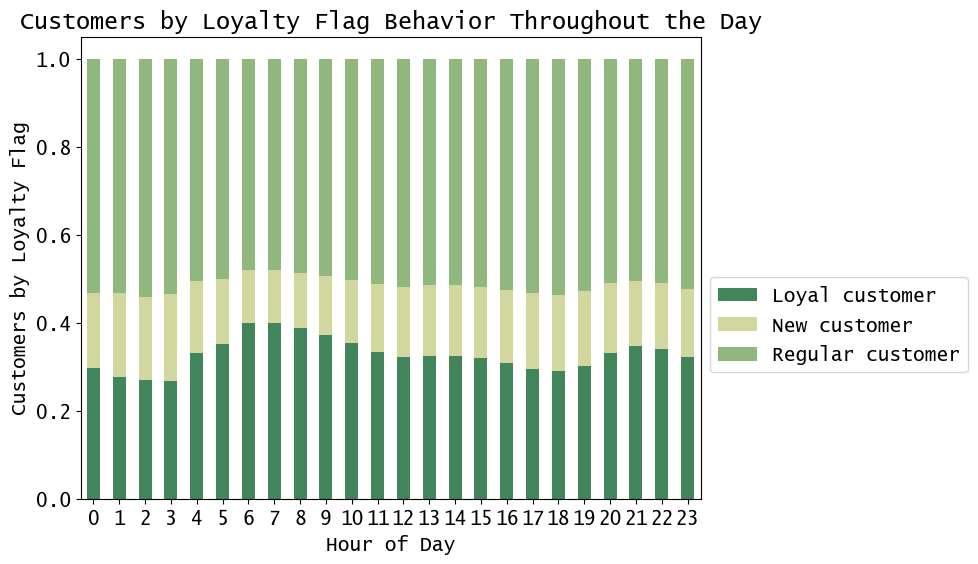

In [31]:
# create a 100% stacked bar chart
stacked_bar_loyalty_orders_hour = loyalty_orders_hour_crosstab.plot(kind = 'bar', stacked = True, color = [loyalty_colors['Loyal customer'], loyalty_colors['New customer'], loyalty_colors['Regular customer']])

# set axis labels and title
plt.xlabel('Hour of Day')
plt.ylabel('Customers by Loyalty Flag')
plt.title('Customers by Loyalty Flag Behavior Throughout the Day')

# move legend outside the plot
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))

# rotate x-axis labels
plt.xticks(rotation = 0)

# show the plot
plt.show()

**Observation**: The chart provides valuable insights into the behavior of different customer segments during the day based on their loyalty status.

- Loyal customers tend to place orders during the early morning hours between 6 and 9am, possibly before starting their day. Additionally, there is another spike in orders from loyal customers late in the day between 9 and 10pm, suggesting they may be placing orders after finishing their daily activities.

- In contrast, new customers tend to place orders during the early morning hours from 1 to 3am, which may indicate that they are night owls or have unusual schedules.

- Regular customers, on the other hand, exhibit a different pattern, with a preference for placing orders during the late-night hours from 11pm to 3am, as well as during the afternoon from 5 to 6pm.

Based on these findings, Instacart could adjust its marketing campaigns and delivery schedules to better target and serve these different customer segments. For example, offering early-morning delivery options or promotions for loyal customers who place orders at specific times could help to increase customer loyalty and retention.

#### <a id='toc1_2_2_3_'></a>[III.2.3. Distribution of product orders by department](#toc0_)

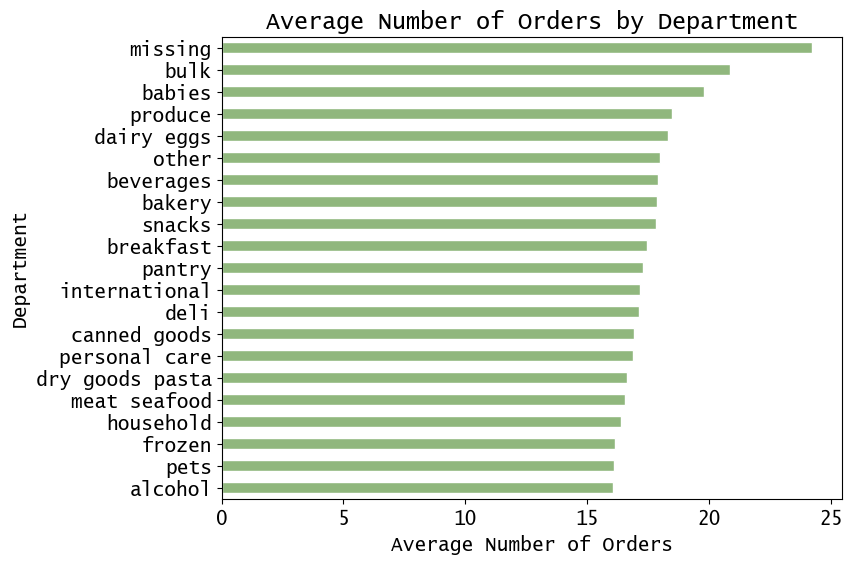

In [37]:
# create a bar chart of the average product orders by department
bar_product_orders_dep = product_orders_dep_sorted.plot(
    kind = 'barh', 
    color = retro[1:], 
    edgecolor = 'white', 
    rot = 0,
    legend = False
    )


# set the title and axis labels
plt.title('Average Number of Orders by Department')
plt.xlabel('Average Number of Orders')
plt.ylabel('Department')

# show the plot
plt.show()

**Observation**: From this data, we can see that the highest average order numbers, besides the missing department, are for the babies and bulk departments, while the lowest average order number is for the alcohol department.

This information can be useful to determine which departments are most popular among their customers and can be used to inform decisions related to product placement and advertising. For example, Instacart may choose to promote products from the babies and bulk departments to increase sales, or may focus on improving offerings in departments with lower order numbers to attract more customers.

#### <a id='toc1_2_2_4_'></a>[III.2.4. Distribution of profiles](#toc0_)

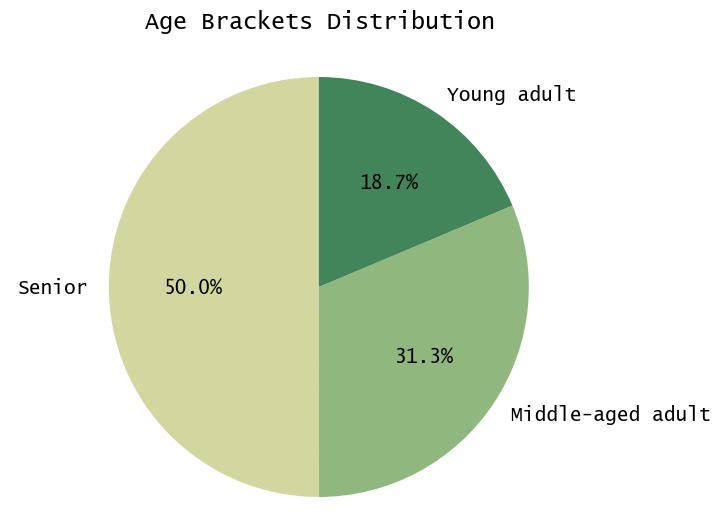

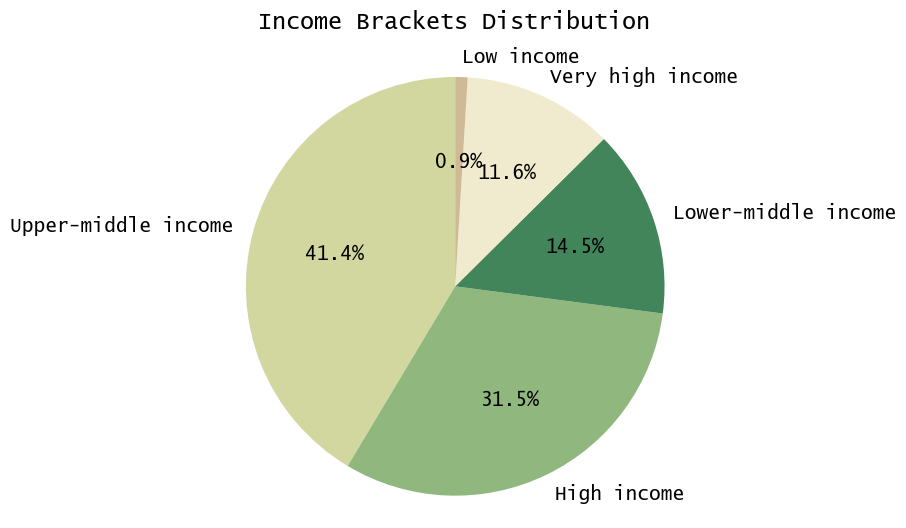

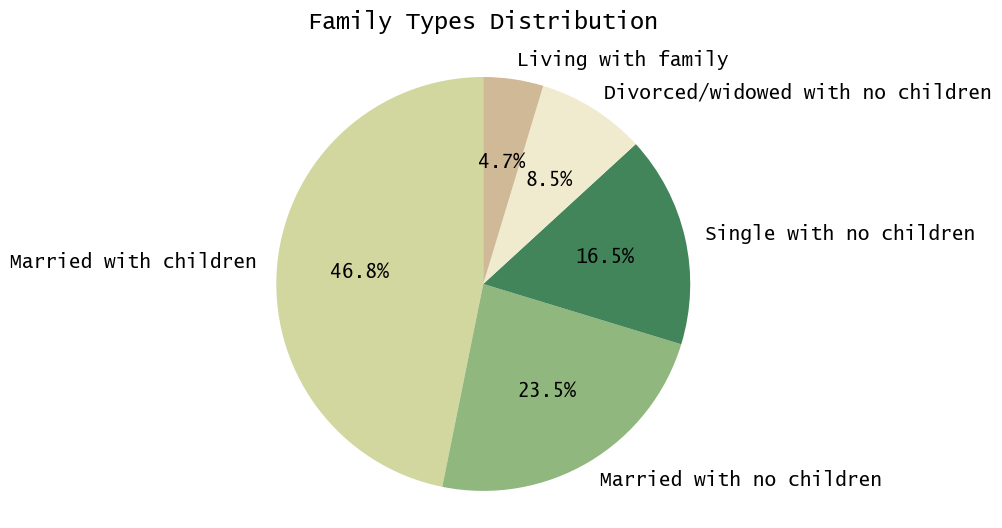

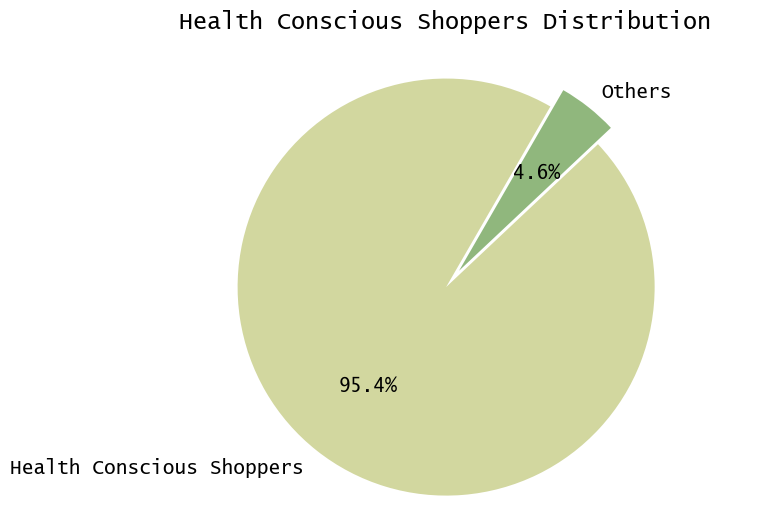

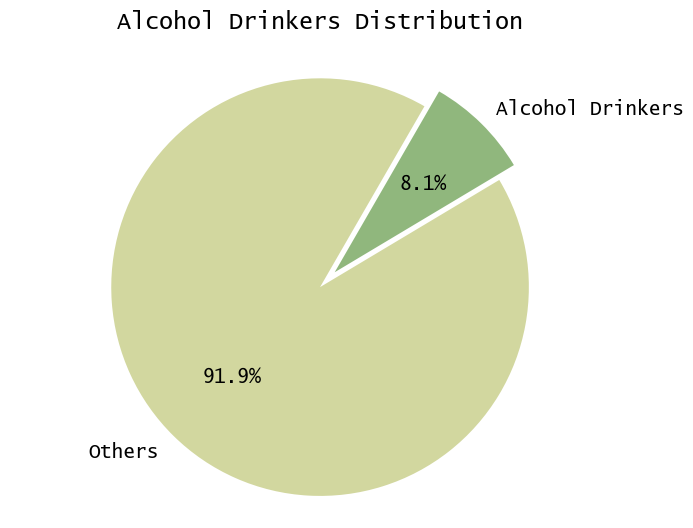

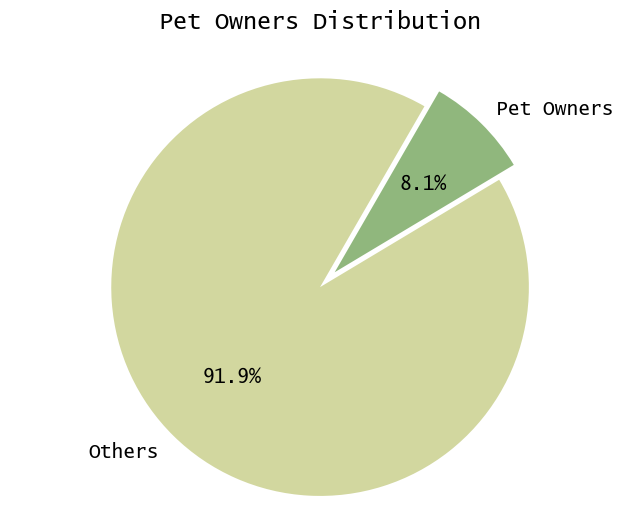

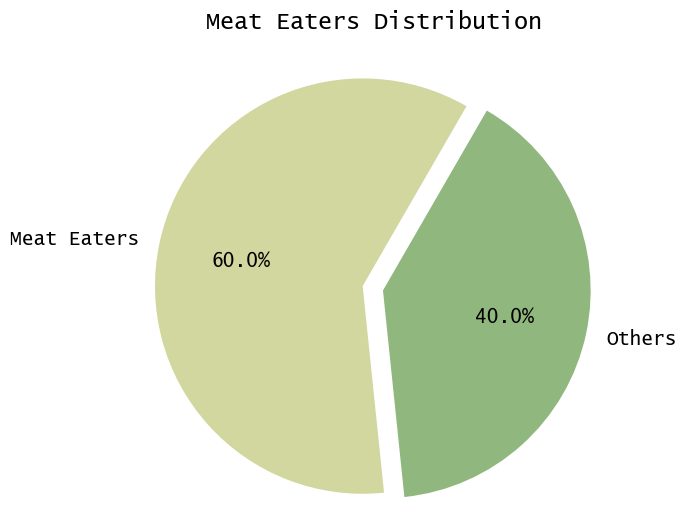

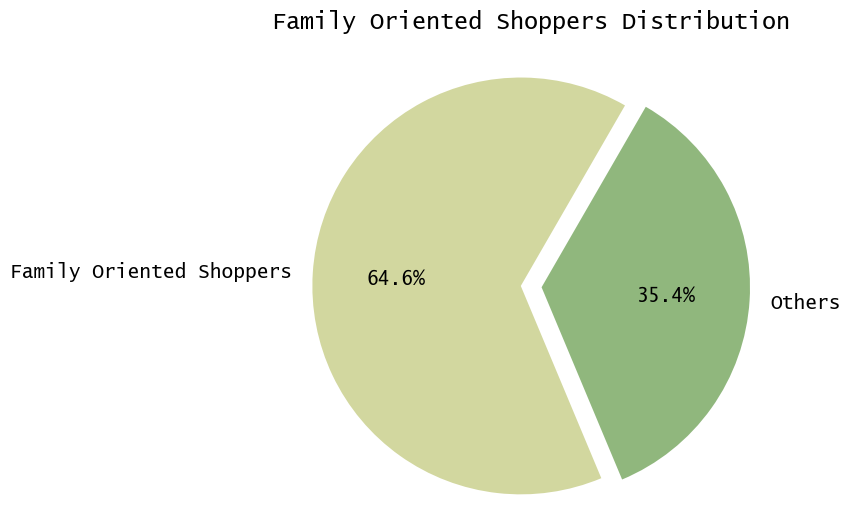

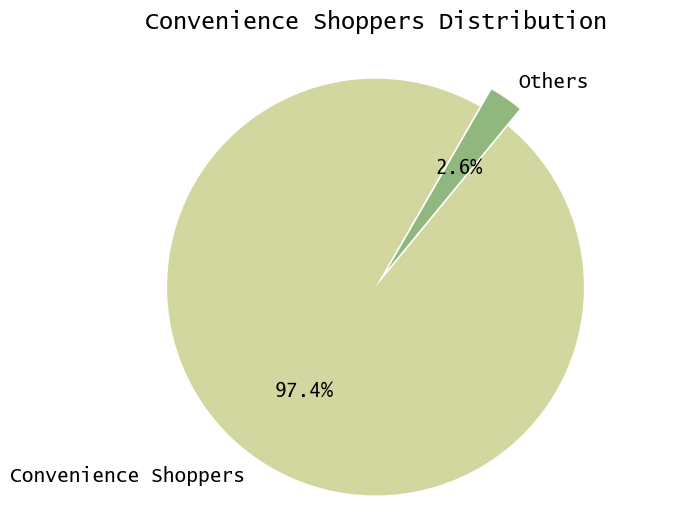

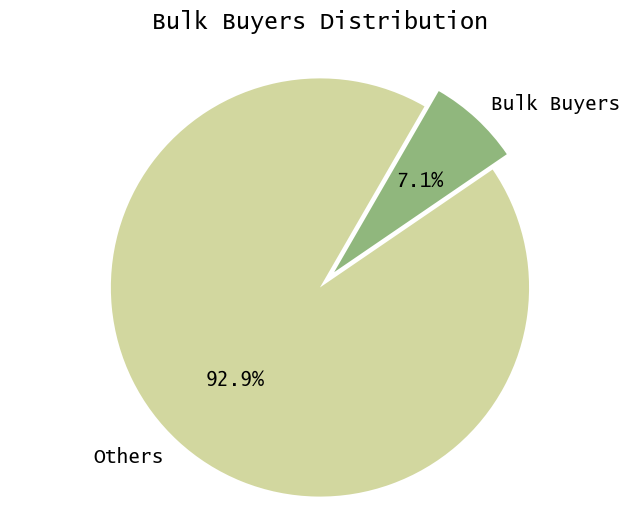

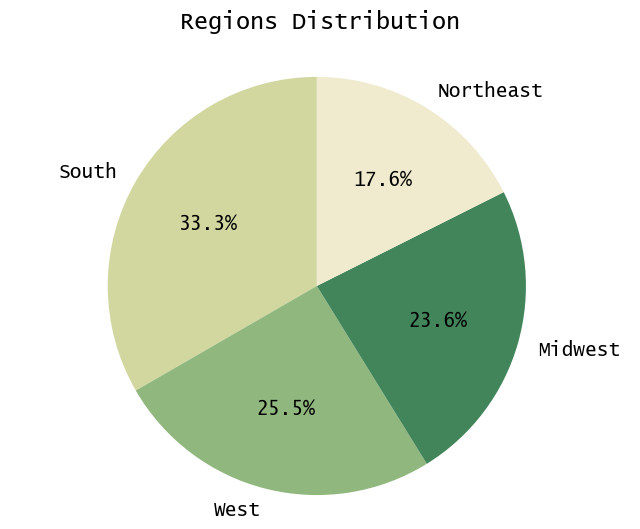

<Figure size 800x600 with 0 Axes>

In [38]:
# create loop to iterate through each column in customer_profiles_with_region
for piece in customer_profiles_with_region:
    # reformat column names
    piece_name = piece.replace('_', ' ').title() + 's'
    # set the 'explode' parameter to [0,0.1] and startangle to 60 if there are fewer than 3 variables in the chart
    if len(df_unique_user[piece].value_counts()) < 3:
        explode = [0,0.1]
        startangle = 60
    else:
        explode = None
        startangle = 90
    # create a pie chart for the column visualizing its distribution        
    pie_chart = df_unique_user[piece].value_counts().plot(
        kind = 'pie',
        colors = retro,
        labels = [piece_name if x == 'Yes' else 'Others' if x == 'No' else x for x in df_unique_user[piece].value_counts().index],
        autopct = '%1.1f%%',
        startangle = startangle,
        explode = explode
    )
    
    # set the title and aspect ratio
    plt.title(f'{piece_name} Distribution', pad = 20)
    plt.axis('equal')
    
    # remove the y-axis label
    pie_chart.set_ylabel(None)
        
    # save the chart
    file_name_pie = f'pie_{piece}_distribution.png'
    file_path_pie = os.path.join(path, '04 Analysis', 'Visualizations', file_name_pie)
    plt.savefig(file_path_pie, bbox_inches = 'tight')
    
    #display the chart
    plt.show()
    
    # clear the figure for the next iteration
    plt.clf()

**Observation**:

The majority of Instacart customers are senior citizens, middle-aged adults, or young adults with upper-middle or high-income. Most of them are married with children and value health-consciousness and family-oriented and convenience shopping. However, alcohol drinkers, pet owners, and meat-eaters are a small percentage of customers. The southern region of the United States has the highest concentration of customers.

In conclusion, Instacart could consider offering products and services that cater to families and convenience shoppers, and focus on premium product deals and services for customers with high purchasing power.

#### <a id='toc1_2_2_5_'></a>[III.2.5. Customer profiles vs. regions and departments comparison](#toc0_)

##### <a id='toc1_2_2_5_1_'></a>[III.2.5.1. Customer profiles vs. regions](#toc0_)

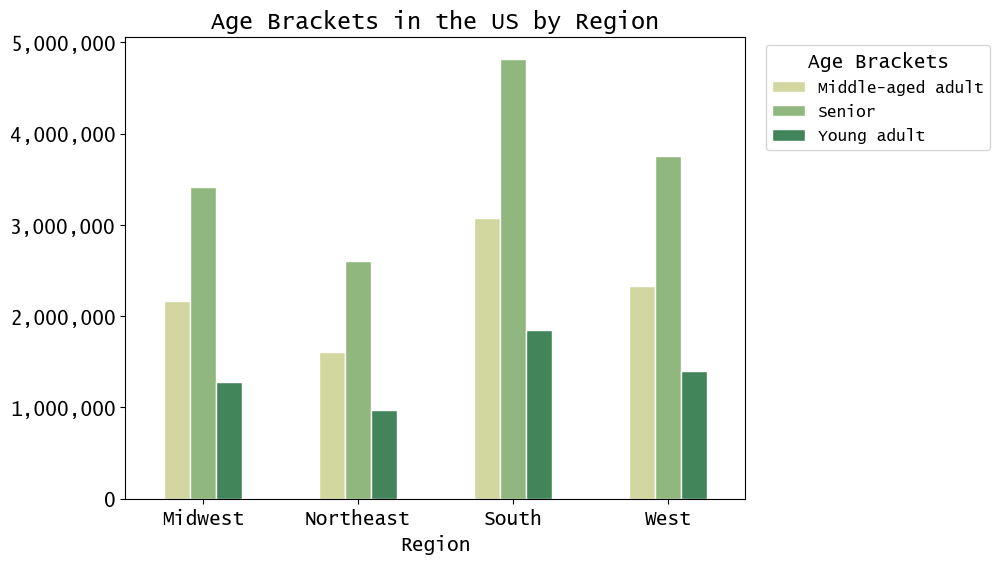

<Figure size 800x600 with 0 Axes>

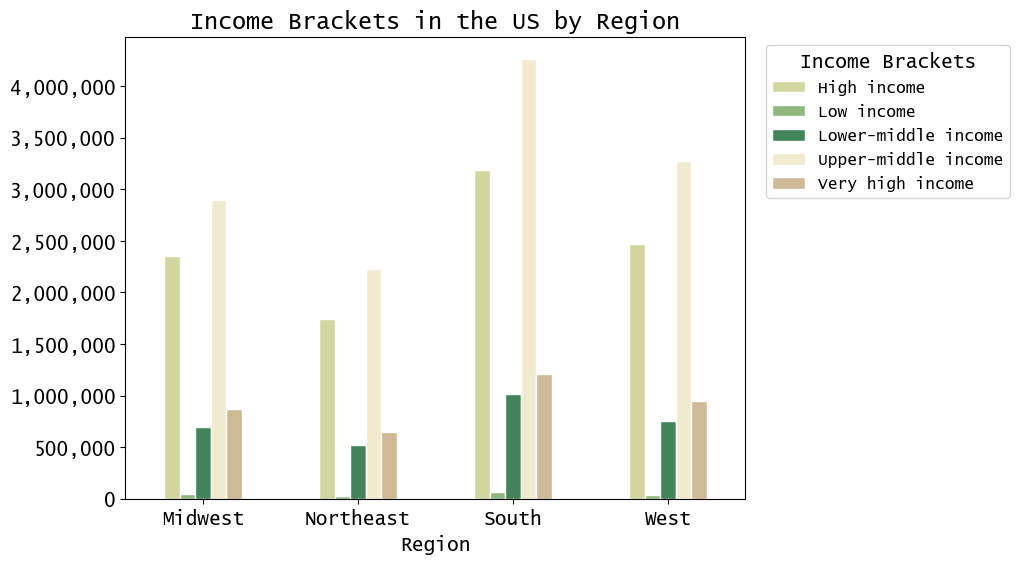

<Figure size 800x600 with 0 Axes>

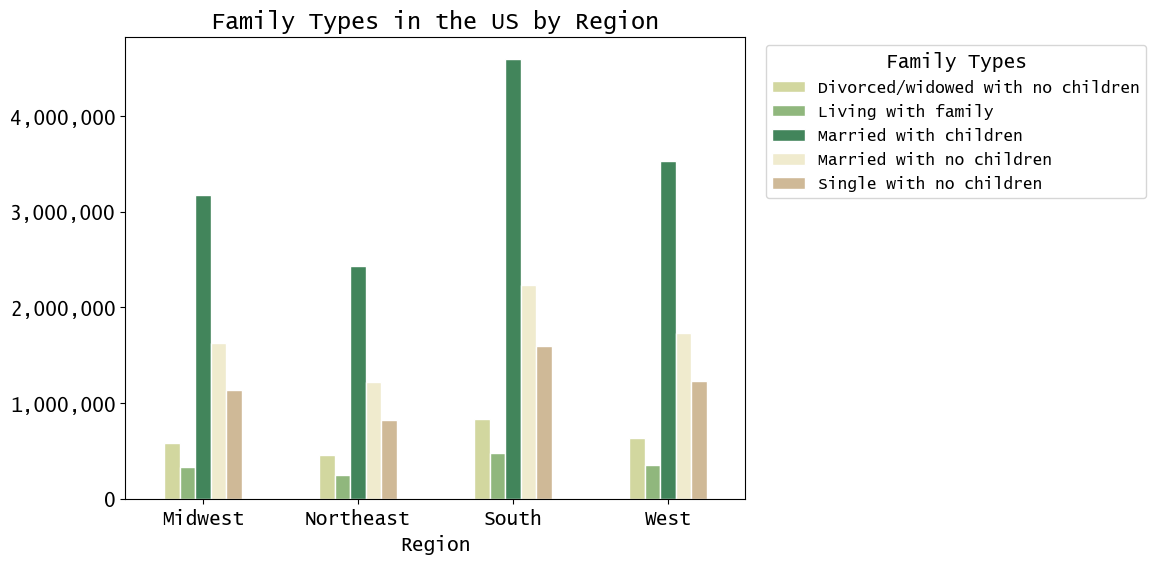

<Figure size 800x600 with 0 Axes>

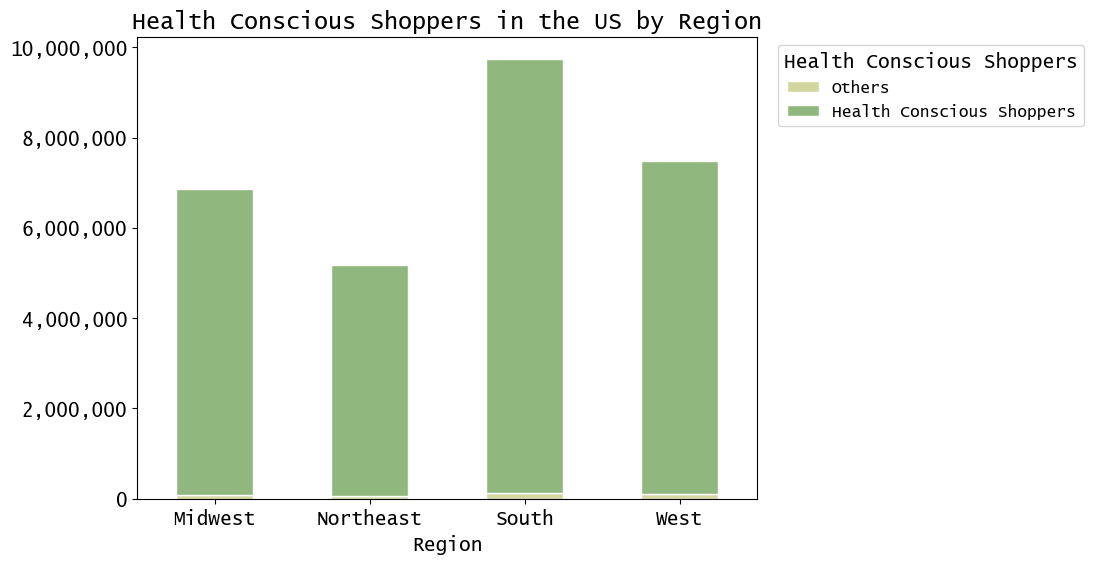

<Figure size 800x600 with 0 Axes>

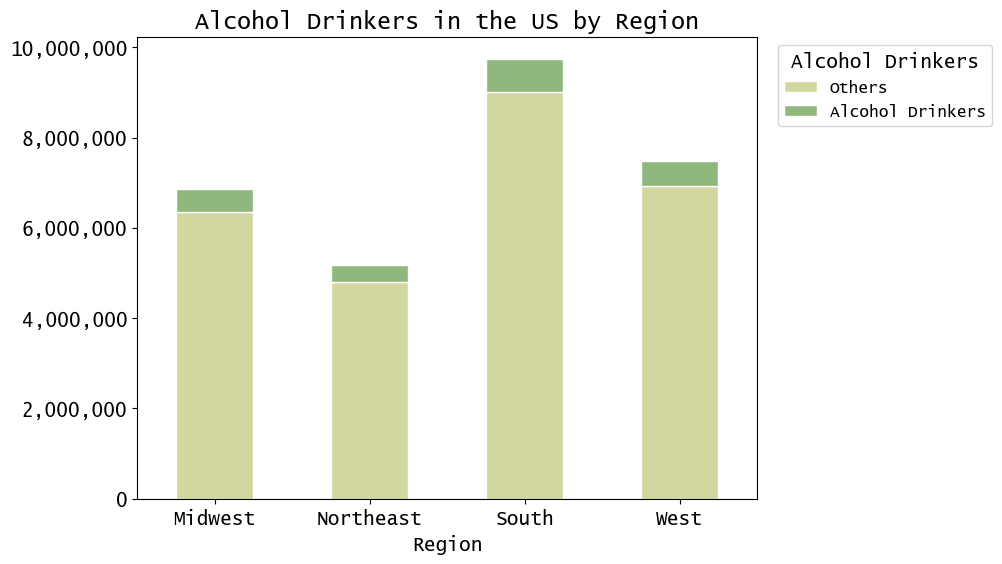

<Figure size 800x600 with 0 Axes>

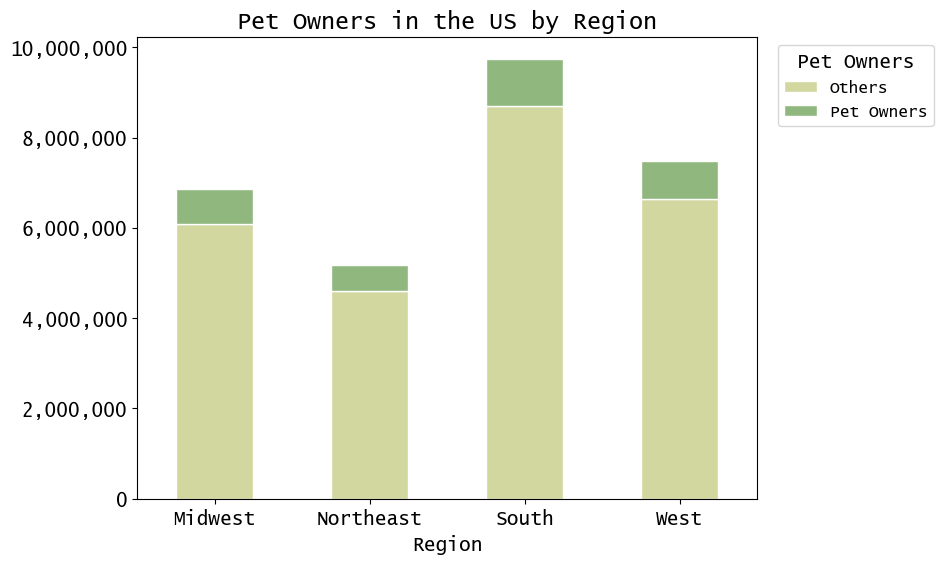

<Figure size 800x600 with 0 Axes>

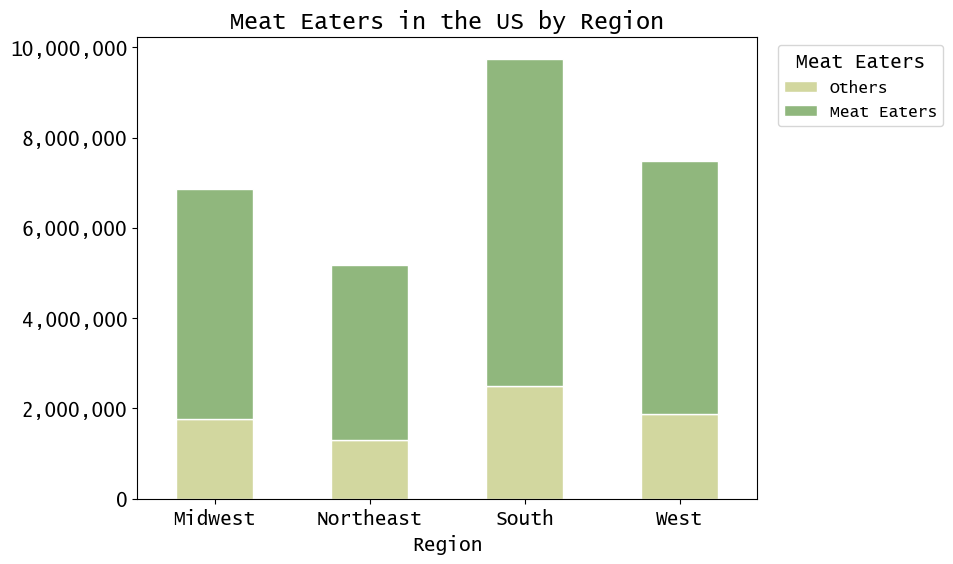

<Figure size 800x600 with 0 Axes>

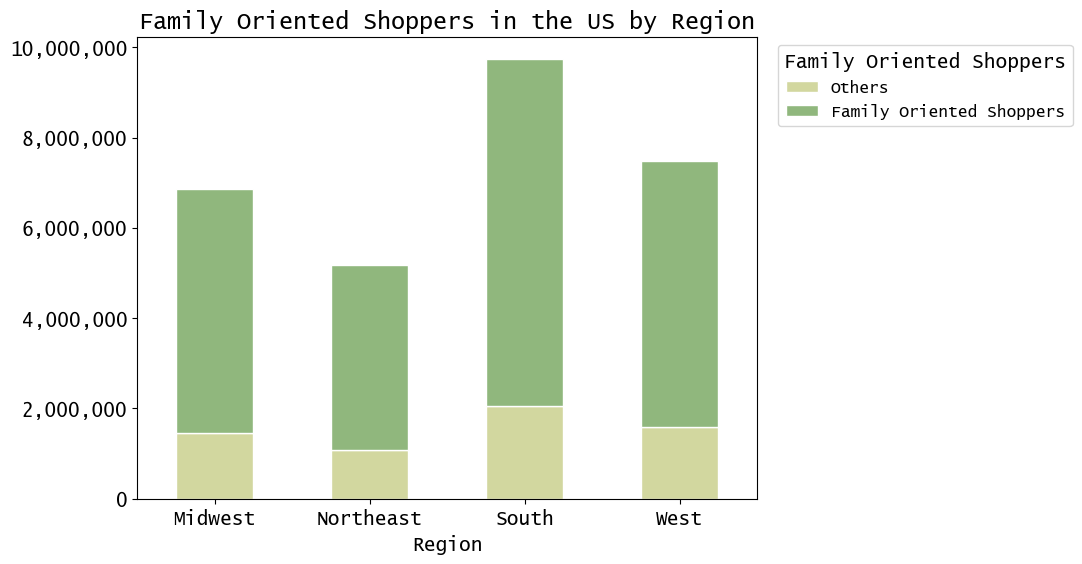

<Figure size 800x600 with 0 Axes>

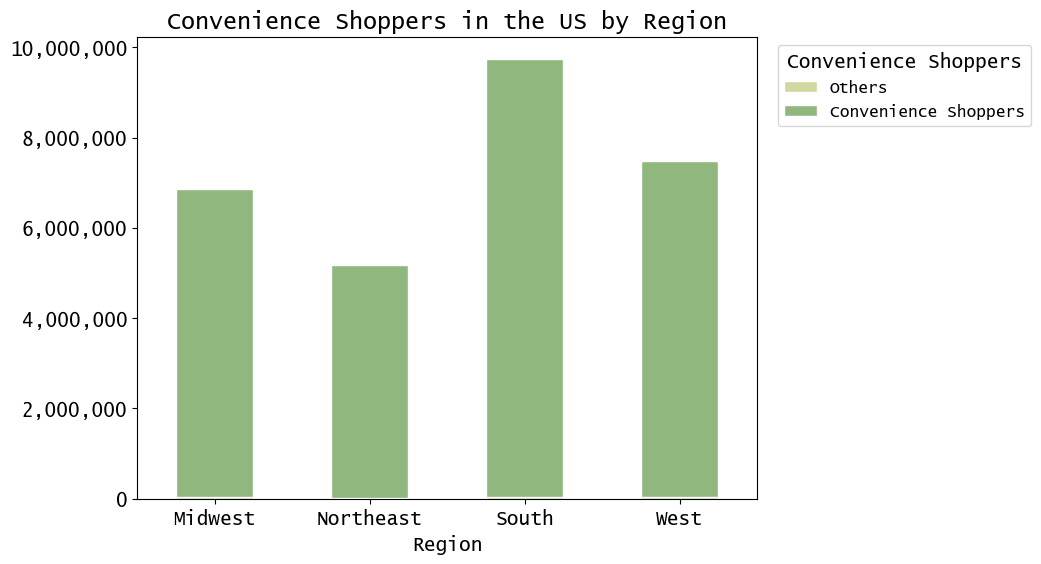

<Figure size 800x600 with 0 Axes>

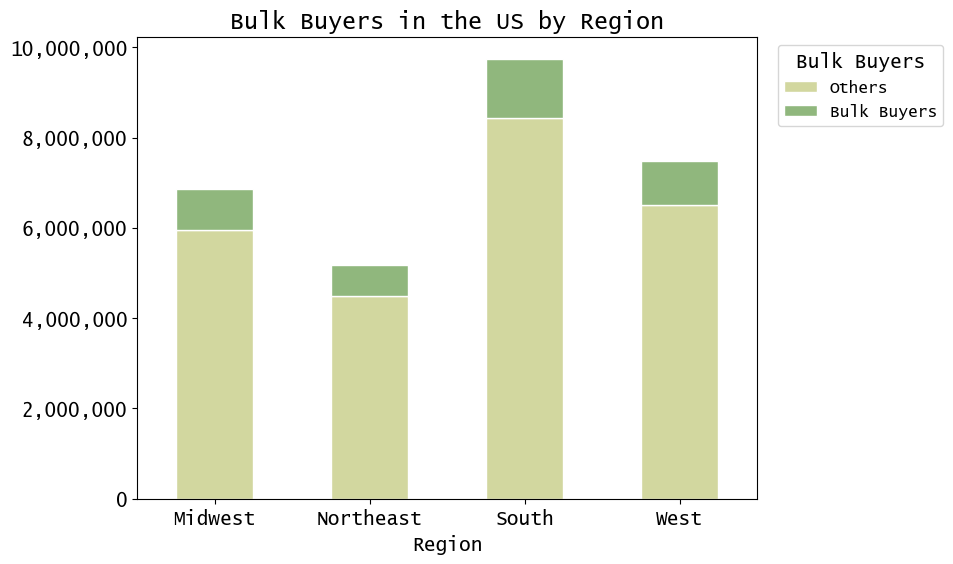

<Figure size 800x600 with 0 Axes>

In [39]:
# create a loop to visualize the region-related crosstabs with stacked bar charts
for col, crosstab in region_crosstab_dict.items():
    fig_region, ax_region = plt.subplots()
    
    # set the 'stacked' parameter to True if the number of bars is smaller than or equal to 2  
    n_bars = len(crosstab.columns)
    if n_bars <= 2:
        stacked = True
    else:
        stacked = False
    region_chart = crosstab.plot(
        kind = 'bar', 
        stacked = stacked, 
        color = retro, 
        edgecolor = 'white', 
        rot = 0, 
        ax = ax_region
    )
    
    # set the titles, axis labels and axis tick formats
    col_name_region = col.replace('_region_crosstab', '').replace('_', ' ').title() + 's'
    ax_region.set_title(f'{col_name_region} in the US by Region')
    ax_region.set_xlabel('Region')
    ax_region.ticklabel_format(style = 'plain', axis = 'y')
    ax_region.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    
    # set the legends
    handles_region, labels_region = ax_region.get_legend_handles_labels()
    new_labels_region = []
    for label_region in labels_region:
        if label_region == 'Yes':
            new_labels_region.append(col_name_region)
        elif label_region == 'No':
            new_labels_region.append('Others')
        else:
            new_labels_region.append(label_region)
    ax_region.legend(
        handles_region, 
        new_labels_region, 
        title = col_name_region, 
        fontsize = 'small',
        bbox_to_anchor = (1.02, 1), 
        loc = 'upper left'
    )
    
    # save the chart
    file_name_region = f'bar_{col}.png'
    file_path_region = os.path.join(path, '04 Analysis', 'Visualizations', file_name_region)
    plt.savefig(file_path_region, bbox_inches= 'tight')
    
    #display the chart
    plt.show()
    
    # clear the figure for the next iteration
    plt.clf()

**Observation**: 

Since the majority of people in all regions are family-oriented shoppers and convenience shoppers, Instacart can focus on promoting products and services that cater to these needs, such as ready-to-eat meals, household essentials, and fast delivery options.

As the South has the highest number of people across all income brackets, Instacart can offer premium products and services to cater to high-income customers in this region.

Instacart can also target regions with a higher concentration of middle-aged and senior adults, such as the Midwest and South, with promotions and deals on products that cater to this demographic, such as health supplements and home medical equipment.

Since the majority of people in all regions are not health-conscious shoppers, alcohol drinkers, pet owners, or bulk buyers, Instacart can explore ways to encourage customers to adopt these behaviors. For example, they can offer discounts on organic and healthy food products or provide special deals for bulk purchases.

Given that the Midwest and South have more meat eaters, Instacart can promote meat-based products and offer discounts on these products in these regions. At the same time, Instacart can also promote meat alternatives and vegetarian products in the Northeast and West, where there is a lower concentration of meat eaters.

##### <a id='toc1_2_2_5_2_'></a>[III.2.5.2. Customer profiles vs. departments comparison](#toc0_)

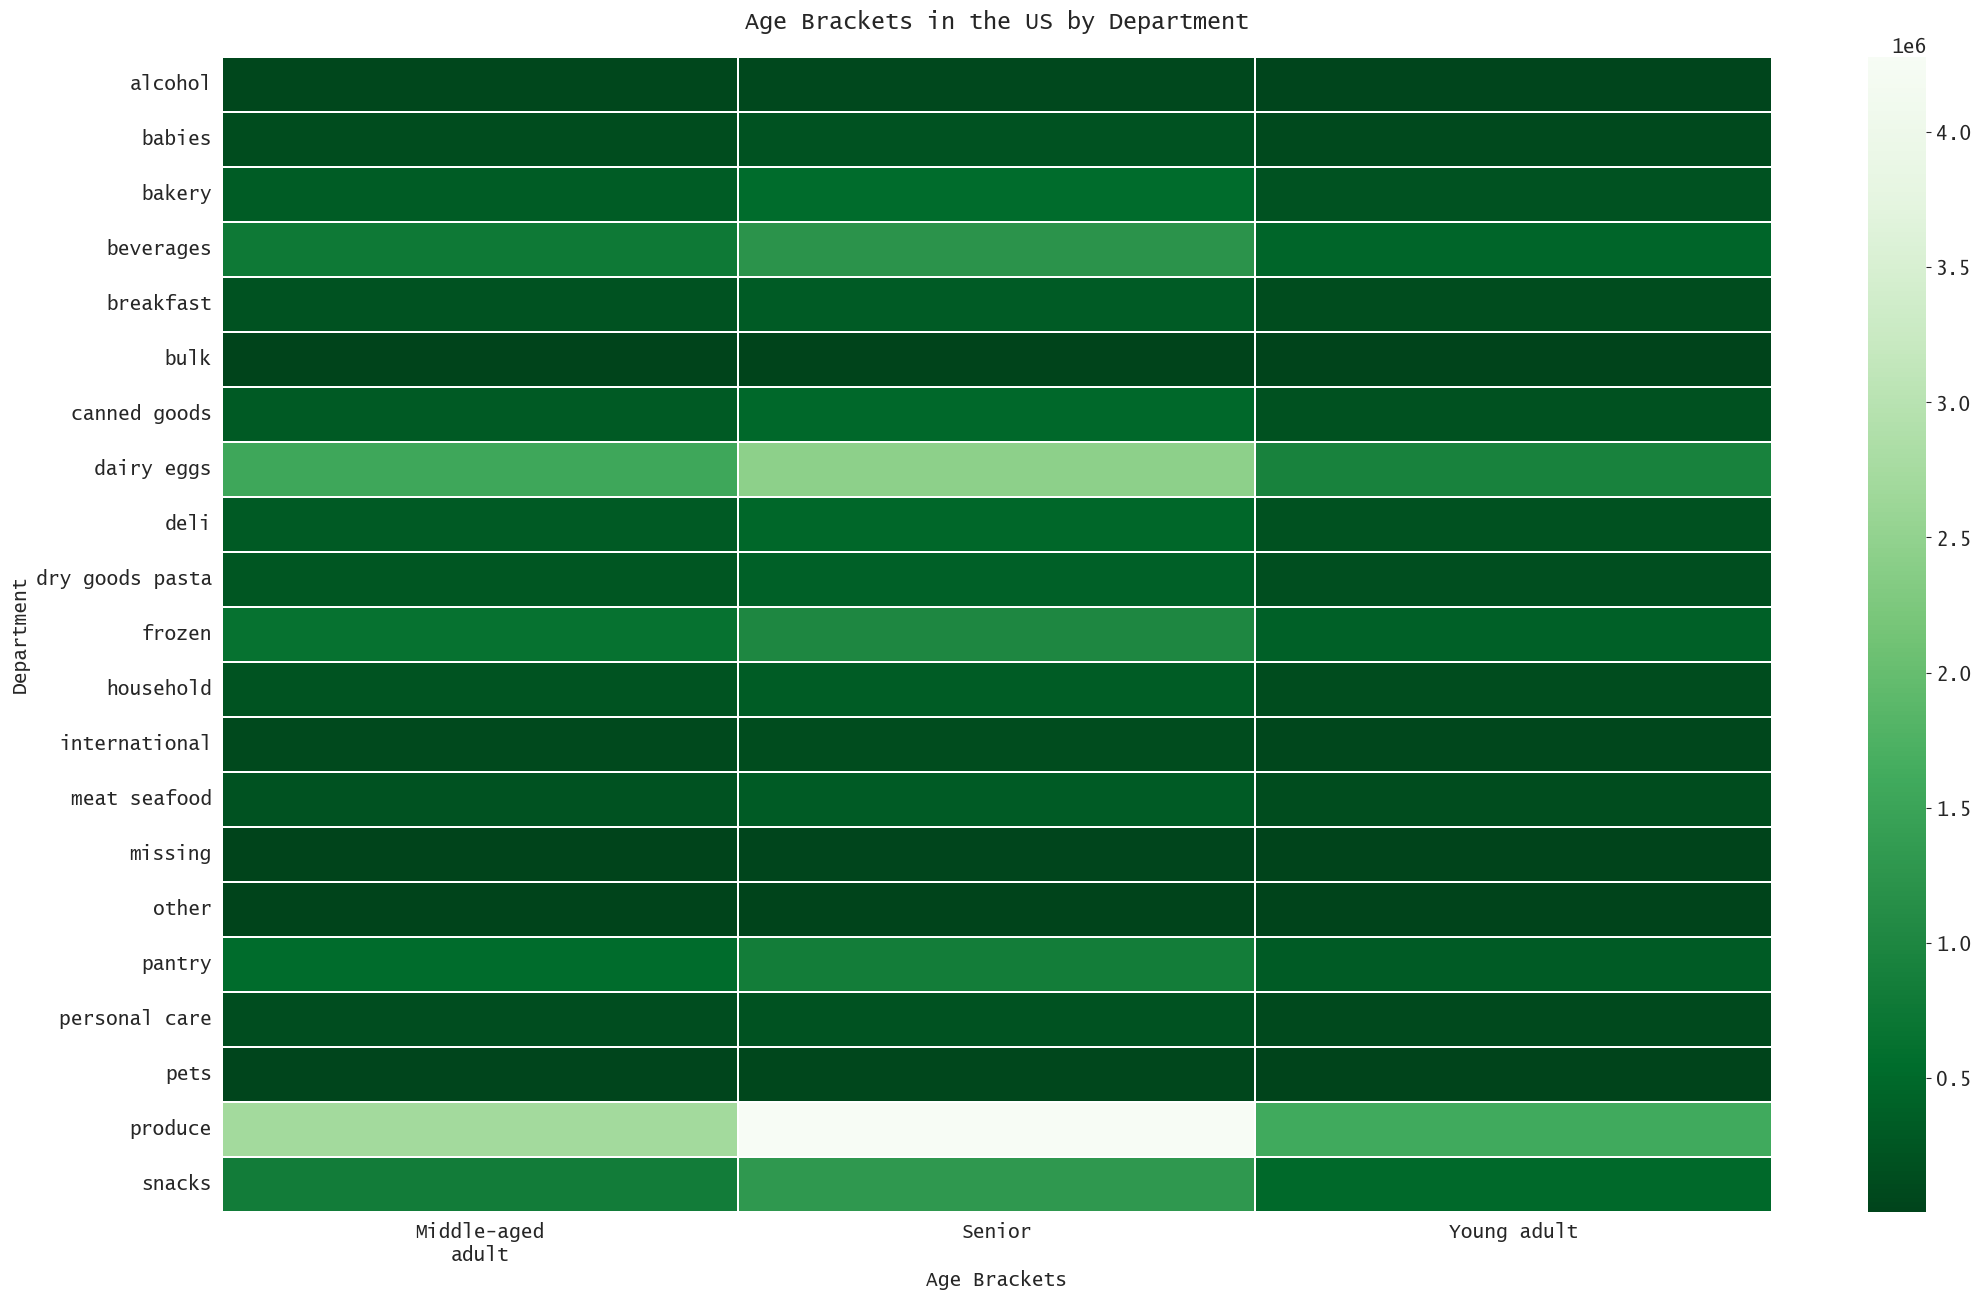

<Figure size 800x600 with 0 Axes>

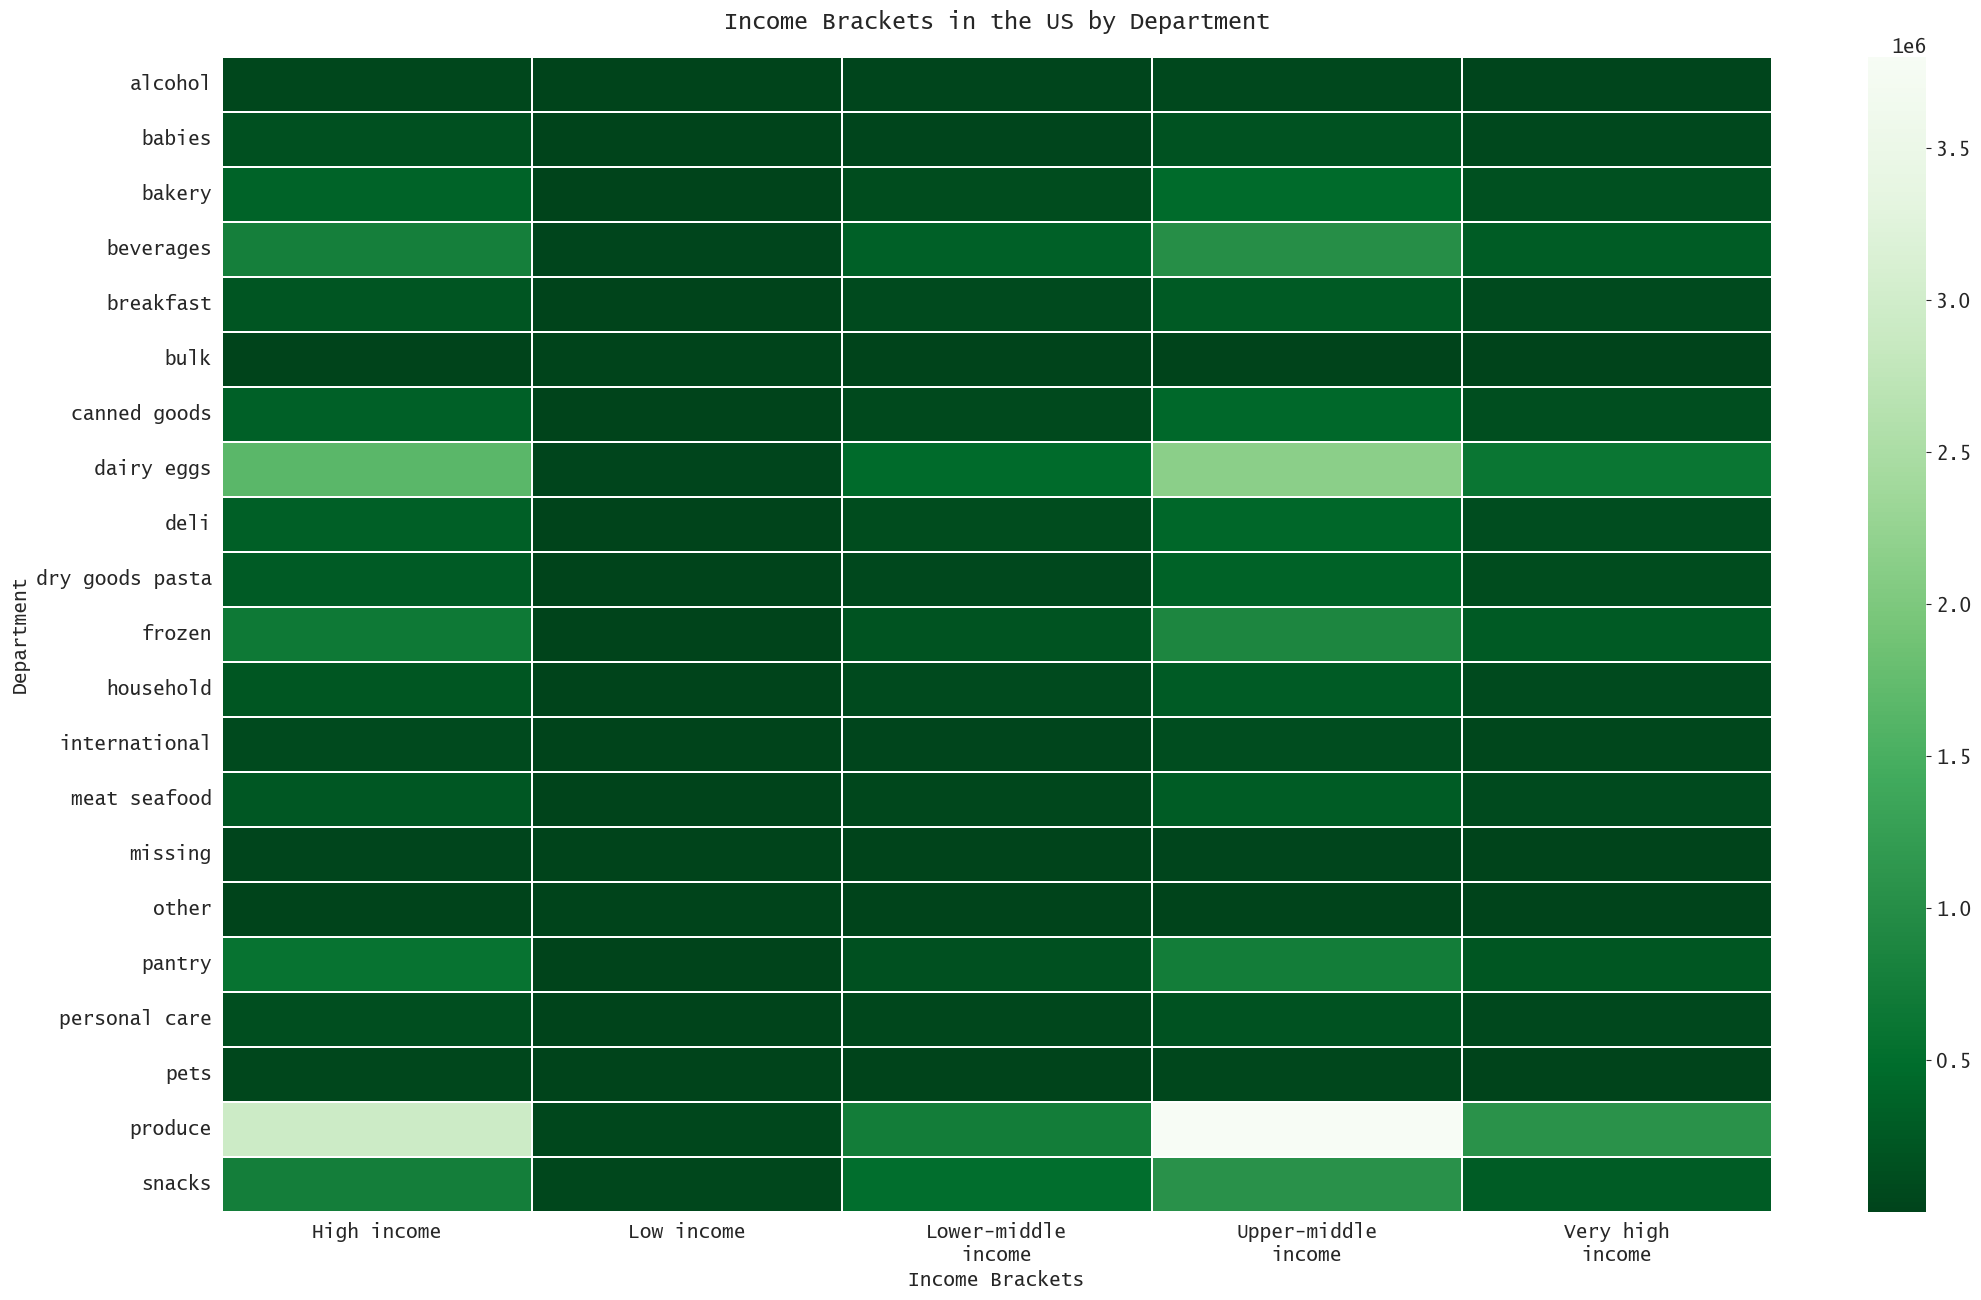

<Figure size 800x600 with 0 Axes>

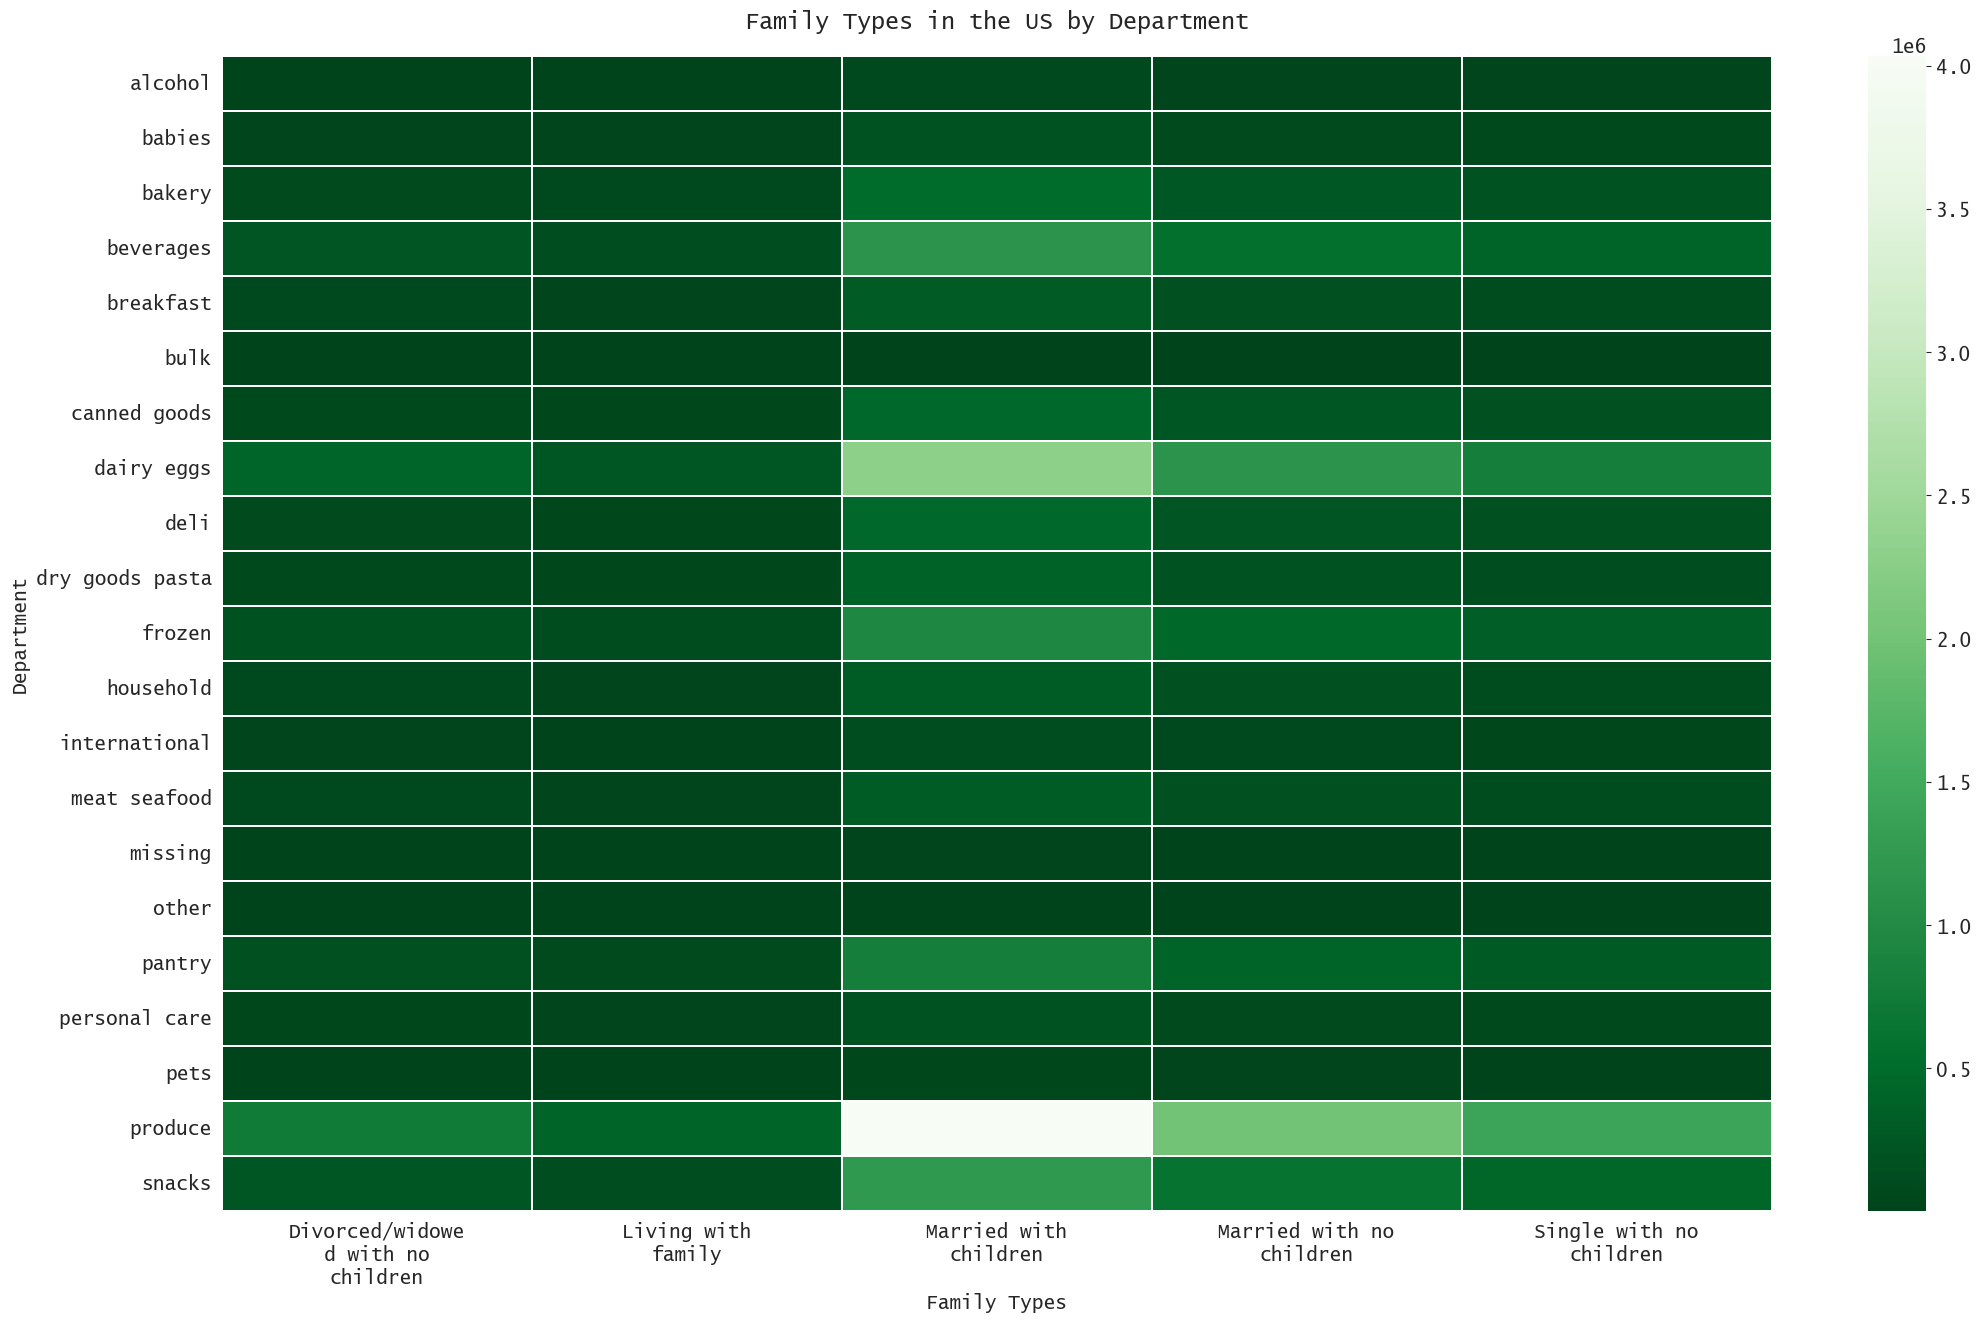

<Figure size 800x600 with 0 Axes>

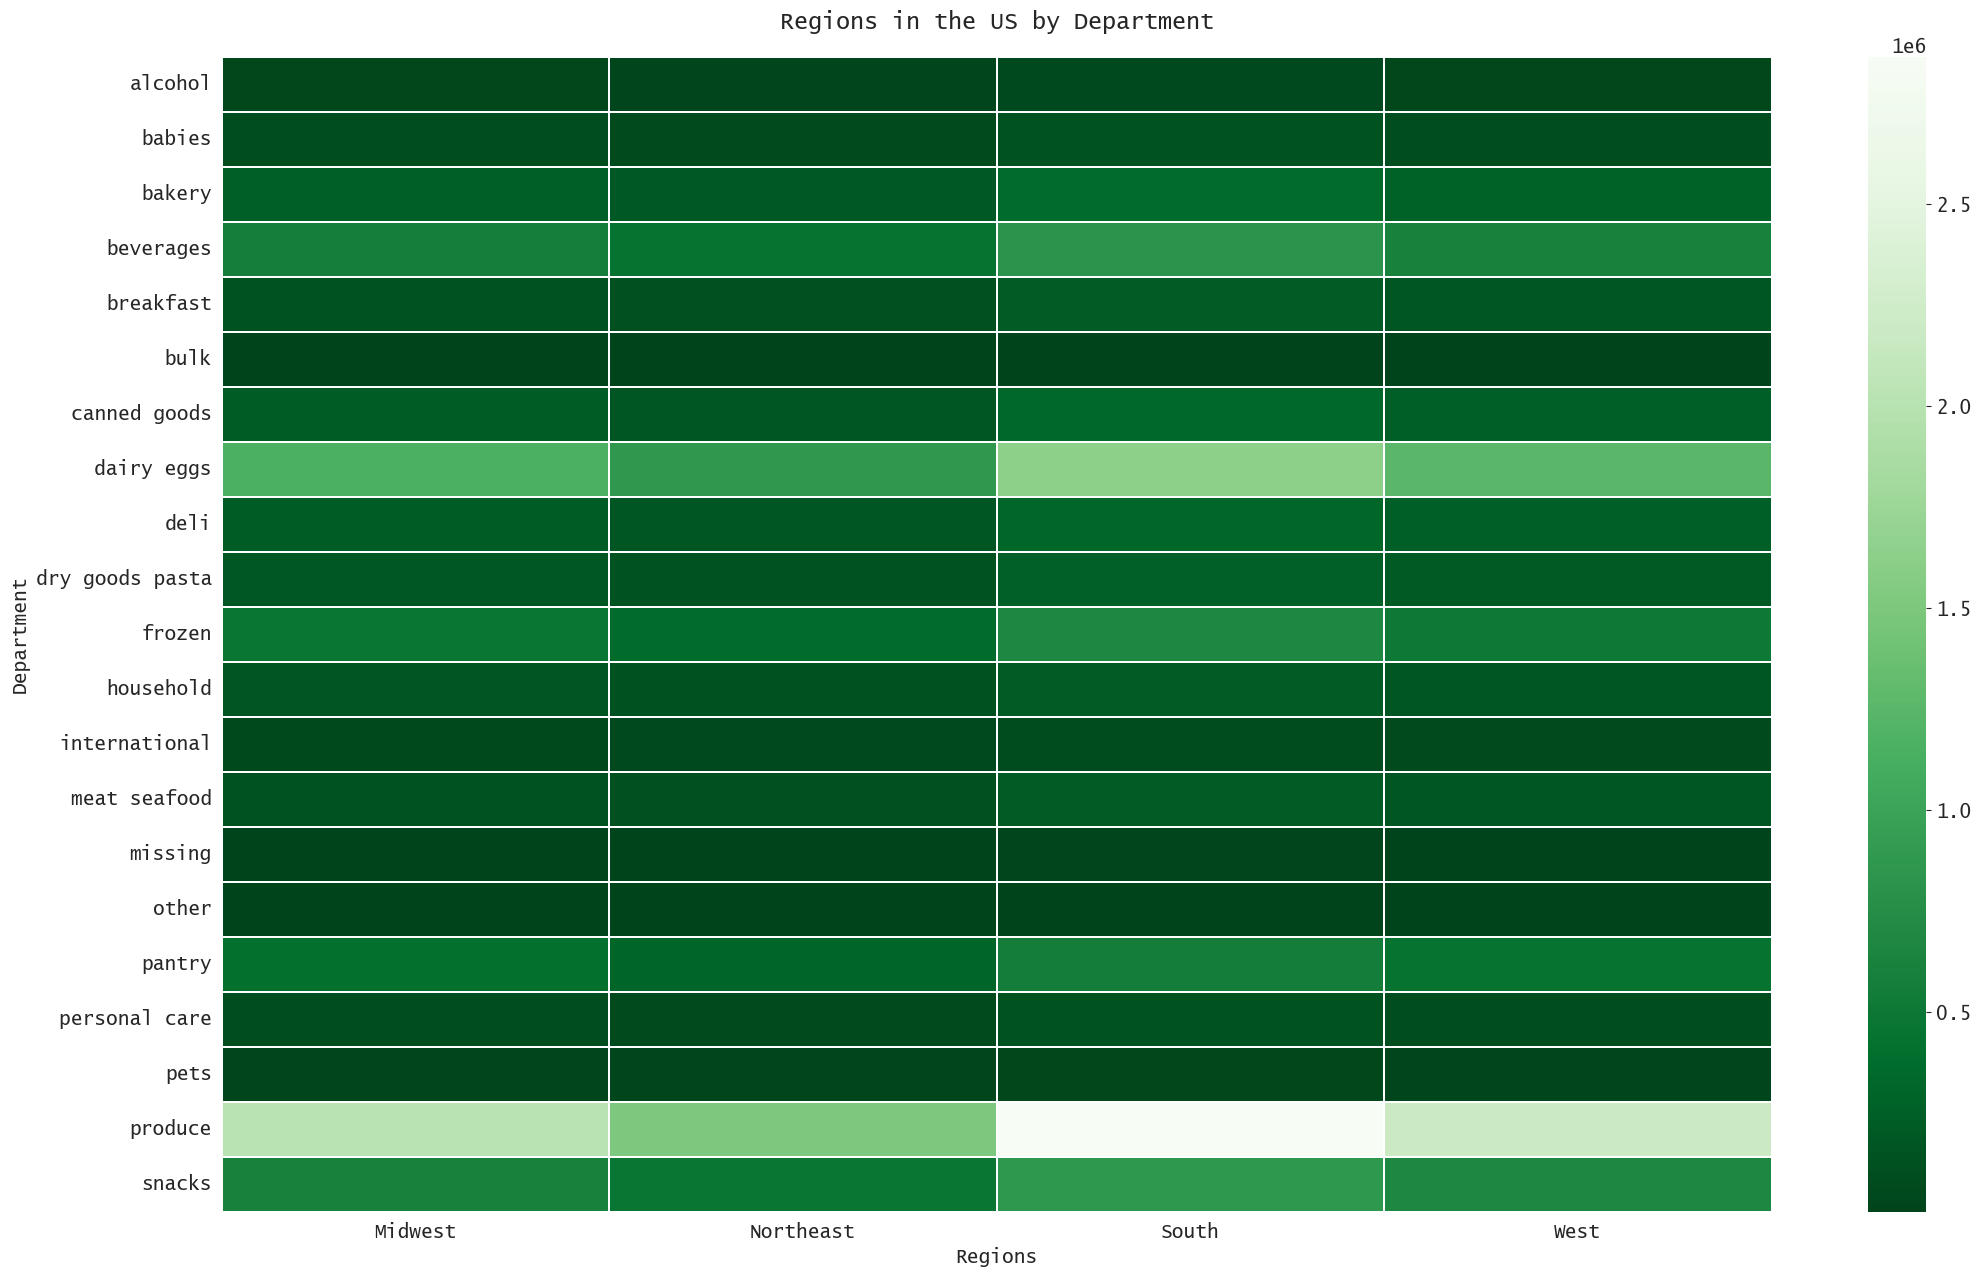

<Figure size 800x600 with 0 Axes>

In [127]:
# create a loop to visualize the department vs. age brackets, income brackets, family types and regions crosstabs with heatmaps
for col, crosstab in list(dep_crosstab_dict.items())[:3] + [list(dep_crosstab_dict.items())[10]]:
    fig_dep, ax_dep = plt.subplots(figsize = (25, 15))

    dep_heatmap = sns.heatmap(
        crosstab,
        annot=False,
        fmt="d",
        cmap= 'Greens_r',
        cbar=True,
        cbar_kws={'shrink': 1},
        linewidths=0.05,
        square = False,
        ax=ax_dep
    )
    

    # set the titles and axis labels
    col_name_dep = col.replace('_dep_crosstab', '').replace('_', ' ').title() + 's'
    ax_dep.set_title(f'{col_name_dep} in the US by Department', pad = 20)
    ax_dep.set_xticklabels(textwrap.fill(x.get_text(), 15) for x in ax_dep.get_xticklabels())
    ax_dep.set_xlabel(col_name_dep)
    ax_dep.set_ylabel('Department')

    # save the chart
    file_name_dep = f'heatmap_{col}.png'
    file_path_dep = os.path.join(path, '04 Analysis', 'Visualizations', file_name_dep)
    plt.savefig(file_path_dep)

    # display the chart
    plt.show()

    # clear the figure for the next iteration
    plt.clf()


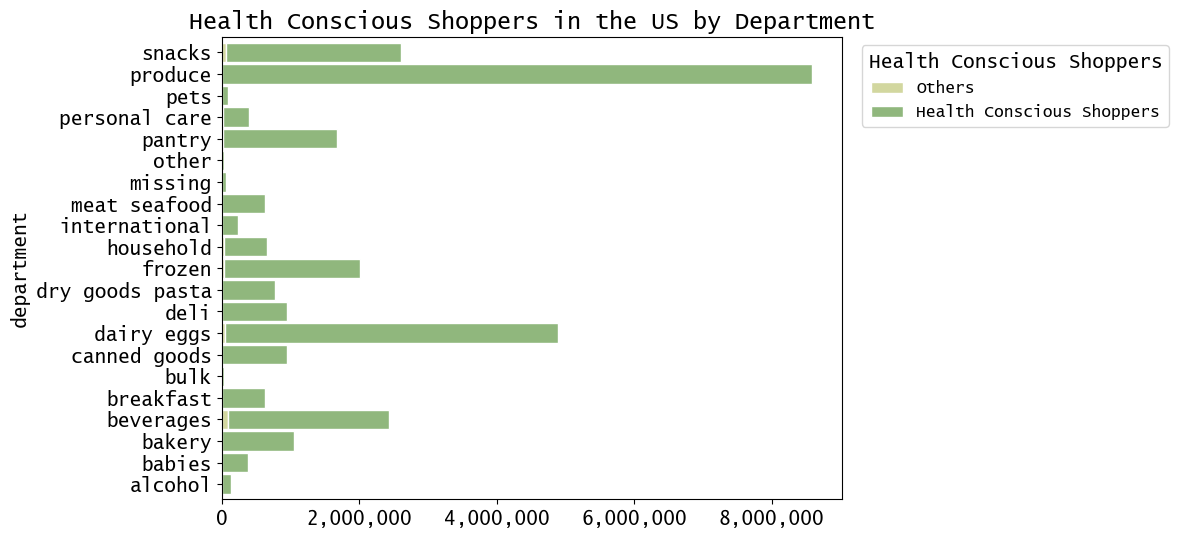

<Figure size 800x600 with 0 Axes>

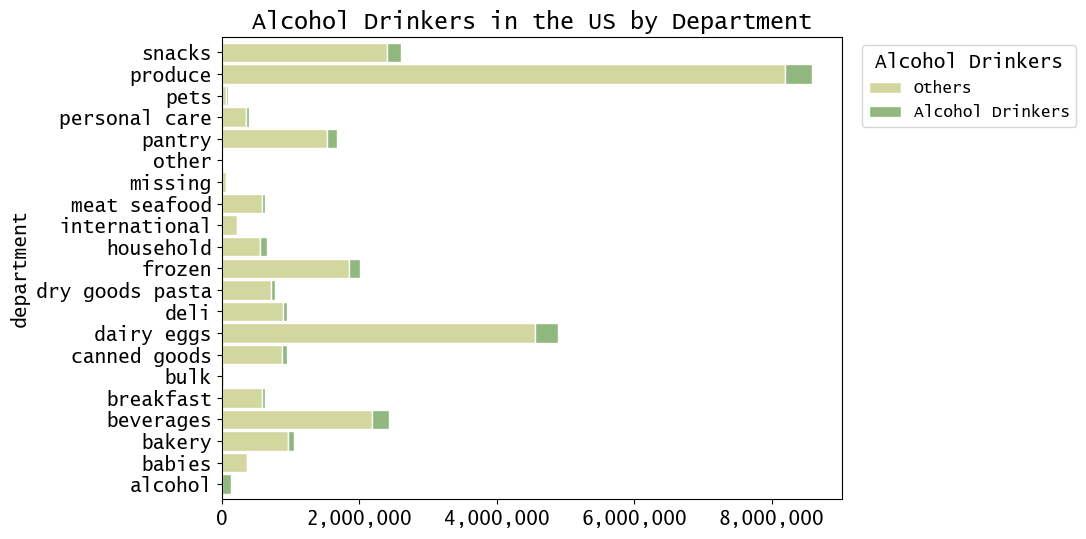

<Figure size 800x600 with 0 Axes>

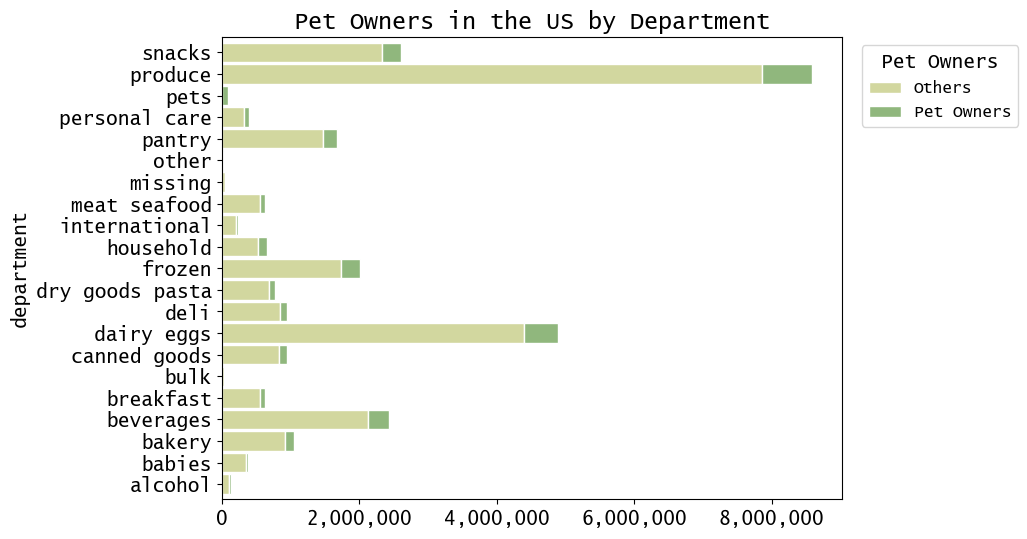

<Figure size 800x600 with 0 Axes>

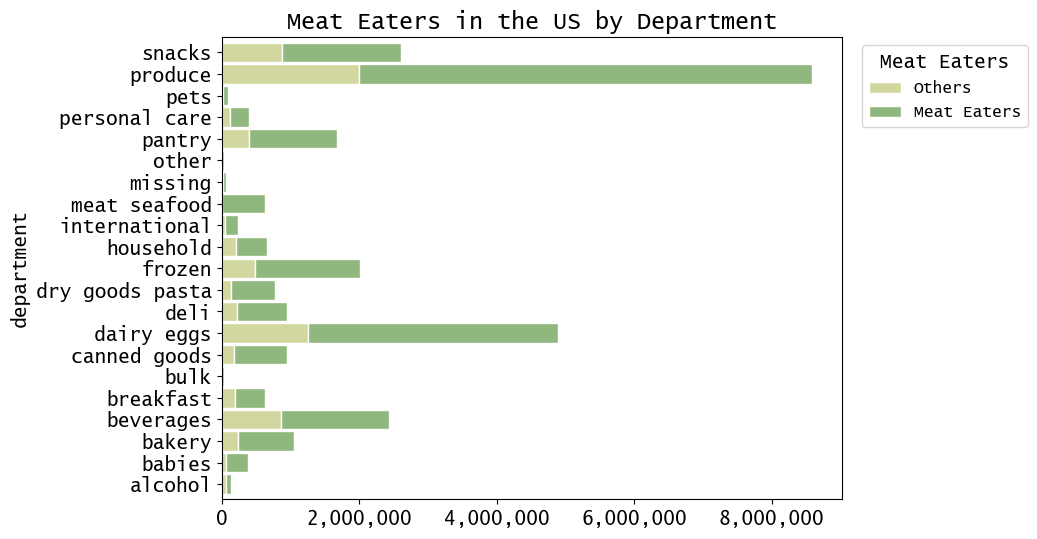

<Figure size 800x600 with 0 Axes>

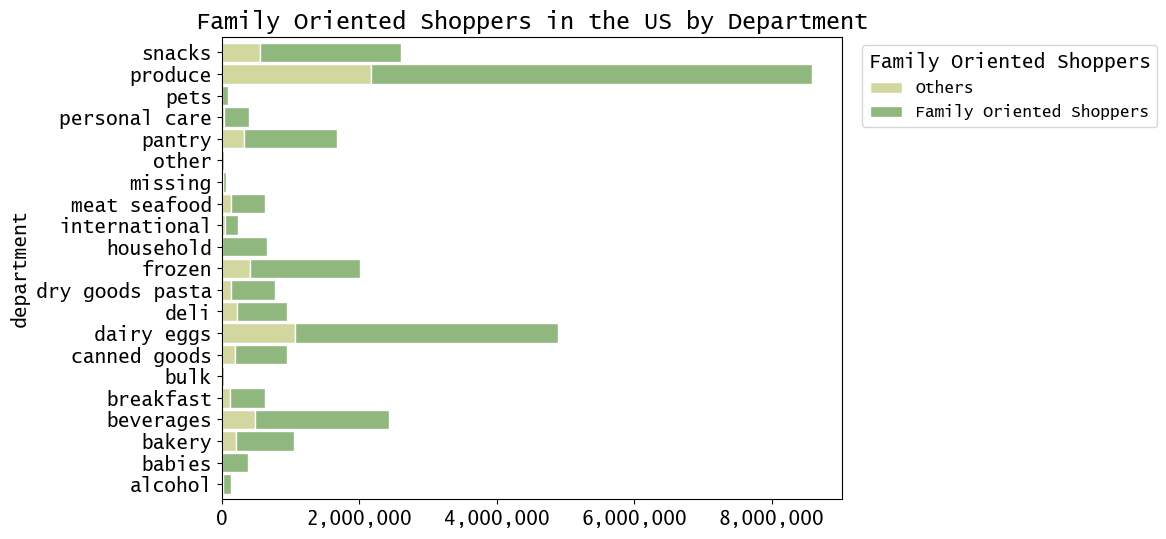

<Figure size 800x600 with 0 Axes>

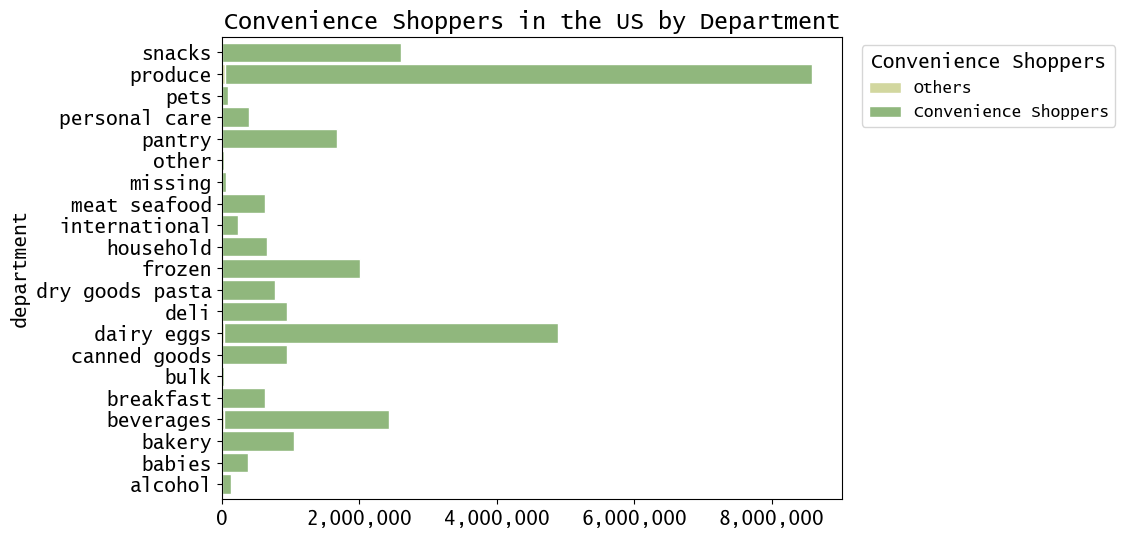

<Figure size 800x600 with 0 Axes>

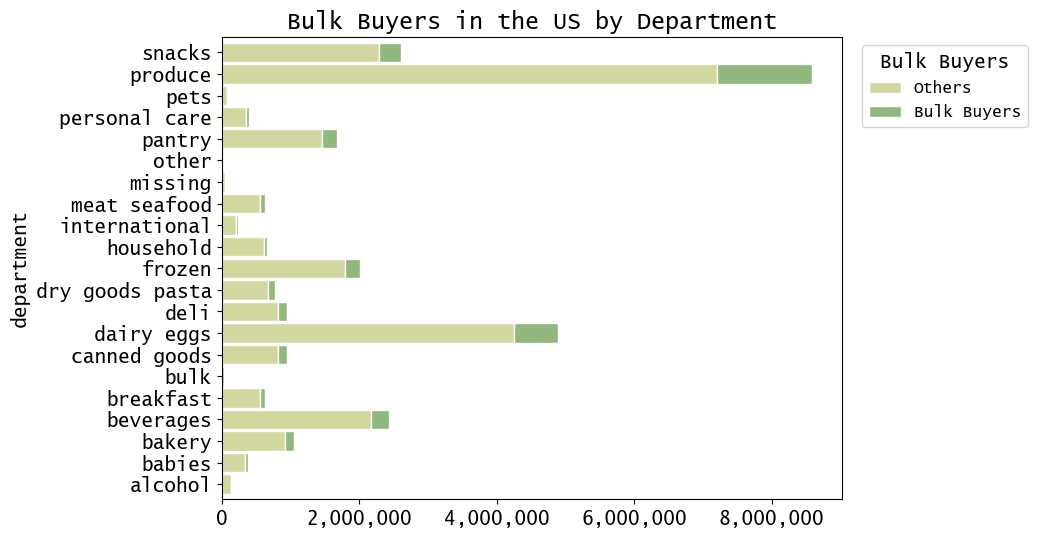

<Figure size 800x600 with 0 Axes>

In [40]:
# create a loop to visualize the department vs. health-conscious shoppers, alcohol drinkers, pet owners, meat eaters, family-oriented shoppers, convenience shoppers and bulk buyers crosstabs with stacked bar charts
for col, crosstab in list(dep_crosstab_dict.items())[3:10]:
    fig_dep, ax_dep = plt.subplots()

    dep_chart = crosstab.plot(
        kind = 'barh',
        width = 0.9, 
        stacked = True, 
        color = retro, 
        edgecolor = 'white', 
        rot = 0, 
        ax = ax_dep
    )
    
    # set the titles, axis labels and axis tick formats
    col_name_dep = col.replace('_dep_crosstab', '').replace('_', ' ').title() + 's'
    ax_dep.set_title(f'{col_name_dep} in the US by Department')
    ax_dep.set_xlabel(None)
    ax_dep.ticklabel_format(style = 'plain', axis = 'x')
    ax_dep.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    
    # set the legends
    handles_dep, labels_dep = ax_dep.get_legend_handles_labels()
    new_labels_dep = []
    for label_dep in labels_dep:
        if label_dep == 'Yes':
            new_labels_dep.append(col_name_dep)
        elif label_dep == 'No':
            new_labels_dep.append('Others')
        else:
            new_labels_dep.append(label_dep)
    ax_dep.legend(
        handles_dep, 
        new_labels_dep, 
        title = col_name_dep, 
        fontsize = 'small',
        bbox_to_anchor = (1.02, 1), 
        loc = 'upper left'
    )
    
    # save the chart
    file_name_dep = f'bar_{col}.png'
    file_path_dep = os.path.join(path, '04 Analysis', 'Visualizations', file_name_dep)
    plt.savefig(file_path_dep, bbox_inches='tight')
    
    #display the chart
    plt.show()
    
    # clear the figure for the next iteration
    plt.clf()

**Observation**: The visualizations show that the 'produce' department has the highest frequency of purchases across all categories of age bracket, income bracket, family type, and health-conscious shopping behavior. This indicates that the 'produce' department is the most popular department among customers.

The data also suggests that customers in the 'dairy eggs' department tend to have a higher income bracket compared to other departments, while customers in the 'babies' department tend to have a lower income bracket.

In terms of family type, customers who are 'married with children' tend to purchase more in the 'beverages' and 'pantry' departments compared to other family types.

Customers who are health-conscious shoppers tend to purchase more in the 'frozen' and 'beverages' departments compared to those who are not health-conscious shoppers.

Overall, the data provides insights into the purchasing behavior of customers , which can help Instacart to better understand their customers and tailor their marketing strategies accordingly.

For example, Instacart can target high-income customers in the 'dairy eggs' department by offering premium products or personalized services.

## <a id='toc1_3_'></a>[IV. Data Cleaning](#toc0_)

In [8]:
# check number of rows and columns in merged_df
print('Number of rows and columns in merged_df:')
merged_df.shape

Number of rows and columns in merged_df:


(29270938, 44)

In [9]:
# check outputs of merged_df
print('Outputs of merged_df:')
merged_df.head(5)

Outputs of merged_df:


,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,income_bracket,family_type,health_conscious_shopper,alcohol_drinker,pet_owner,meat_eater,family_oriented_shopper,convenience_shopper,bulk_buyer,department
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Lower-middle income,Married with no children,Yes,No,No,Yes,Yes,Yes,Yes,snacks
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Lower-middle income,Married with no children,Yes,No,No,Yes,Yes,Yes,Yes,snacks
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Lower-middle income,Married with no children,Yes,No,No,Yes,Yes,Yes,Yes,meat seafood
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Lower-middle income,Married with no children,Yes,No,No,Yes,Yes,Yes,Yes,meat seafood
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Lower-middle income,Married with no children,Yes,No,No,Yes,Yes,Yes,Yes,bulk


In [10]:
# check current columns in merged_df
print('Current columns in merged_df:')
merged_df.columns

Current columns in merged_df:


Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_purchase',
       'add_to_cart_order', 'reordered', 'price_range', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price', 'spending_flag', 'order_freq', 'order_freq_flag', 'gender',
       'state', 'age', 'date_joined', 'number_of_dependants', 'family_status',
       'income', 'region', 'low_activity_flag', 'age_bracket',
       'income_bracket', 'family_type', 'health_conscious_shopper',
       'alcohol_drinker', 'pet_owner', 'meat_eater', 'family_oriented_shopper',
       'convenience_shopper', 'bulk_buyer', 'department'],
      dtype='object')

In [56]:
# drop column 'department' from merged_df
merged_df = merged_df.drop(columns = ['department'])

In [12]:
# check number of rows and columns in merged_df again
print('Number of rows and columns:')
merged_df.shape

Number of rows and columns:


(29270938, 43)

## <a id='toc1_4_'></a>[V. Data Export](#toc0_)

In [57]:
# save scartterplot scatter_age_family_status_order_hour in .png format
scatter_age_family_status_order_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_family_status_order_hour.png'), bbox_inches='tight')

In [49]:
# save chart stacked_bar_loyalty_orders_dow in .png format
stacked_bar_loyalty_orders_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked_bar_loyalty_orders_dow.png'), bbox_inches='tight')

In [50]:
# save chart stacked_bar_loyalty_orders_hour in .png format
stacked_bar_loyalty_orders_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked_bar_loyalty_orders_hour.png'), bbox_inches='tight')

In [ ]:
# save chart bar_product_orders_dep in .png format
bar_product_orders_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_product_orders_dep.png'), bbox_inches='tight')

In [58]:
# export merged_df in .pkl format
merged_df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_all.pkl'))